**Ezgi CİNKILIÇ - 201301012**

In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Verinin Yüklenmesi

In [ ]:
path = kagglehub.dataset_download("udaymalviya/bank-loan-data")

100%|██████████| 751k/751k [00:00<00:00, 24.4MB/s]

Extracting files...


In [ ]:
data = pd.read_csv(path + "/loan_data.csv")

In [ ]:
data.head()

person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561   
1                 0.08                         2.0           504   
2                 0.44                         3.0           635   
3                 0.44                         2.0           675   
4                 0.53                         4.0           586   

  previous_loan_defaults_on_file  loan_status  
0                             No            1  
1                            Yes            0  
2                             No            1  
3                             No            1  
4                             No            1

In [ ]:
data.describe()

person_age  person_income  person_emp_exp     loan_amnt  \
count  45000.000000   4.500000e+04    45000.000000  45000.000000   
mean      27.764178   8.031905e+04        5.410333   9583.157556   
std        6.045108   8.042250e+04        6.063532   6314.886691   
min       20.000000   8.000000e+03        0.000000    500.000000   
25%       24.000000   4.720400e+04        1.000000   5000.000000   
50%       26.000000   6.704800e+04        4.000000   8000.000000   
75%       30.000000   9.578925e+04        8.000000  12237.250000   
max      144.000000   7.200766e+06      125.000000  35000.000000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
count   45000.000000         45000.000000                45000.000000   
mean       11.006606             0.139725                    5.867489   
std         2.978808             0.087212                    3.879702   
min         5.420000             0.000000                    2.000000   
25%         8.590000             0.070000                    3.000000   
50%        11.010000             0.120000                    4.000000   
75%        12.990000             0.190000                    8.000000   
max        20.000000             0.660000                   30.000000   

       credit_score   loan_status  
count  45000.000000  45000.000000  
mean     632.608756      0.222222  
std       50.435865      0.415744  
min      390.000000      0.000000  
25%      601.000000      0.000000  
50%      640.000000      0.000000  
75%      670.000000      0.000000  
max      850.000000      1.000000

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

#EDA

**Veri Seti İçeriği**

*Kişisel Bilgiler*

* person_age: Başvuru sahibinin yaşı (yıl cinsinden).

* person_gender: Başvuru sahibinin cinsiyeti (erkek, kadın).

* person_education: Başvuru sahibinin eğitim durumu (Lise, Lisans, Yüksek Lisans, vb.).

* person_income: Başvuru sahibinin yıllık geliri (USD cinsinden).

* person_emp_exp: Çalışma deneyimi yılı.

* person_home_ownership: Başvuru sahibinin ev sahipliği durumu (KİRALIK, MÜLK, İPOTEK).

*Kredi ve Kredi Geçmişi*

* loan_amnt: Talep edilen kredi miktarı (USD cinsinden).

* loan_intent: Kredinin amacı (KİŞİSEL, EĞİTİM, SAĞLIK, vb.).

* loan_int_rate: Kredi faiz oranı (yüzde).

* loan_percent_income: Kredi miktarının gelire oranı.

* cb_person_cred_hist_length: Başvuru sahibinin kredi geçmişinin uzunluğu (yıl cinsinden).

* credit_score: Başvuru sahibinin kredi skoru.

* previous_loan_defaults_on_file: Başvuru sahibinin daha önce kredi temerrütleri olup olmadığı (Evet veya Hayır).

*Hedef Değişken*

loan_status: Kredinin başarıyla geri ödenip ödenmediğini gösteren hedef değişken (başarıyla ödenmişse 1, başvuru sahibi temerrüde düşmüşse 0).

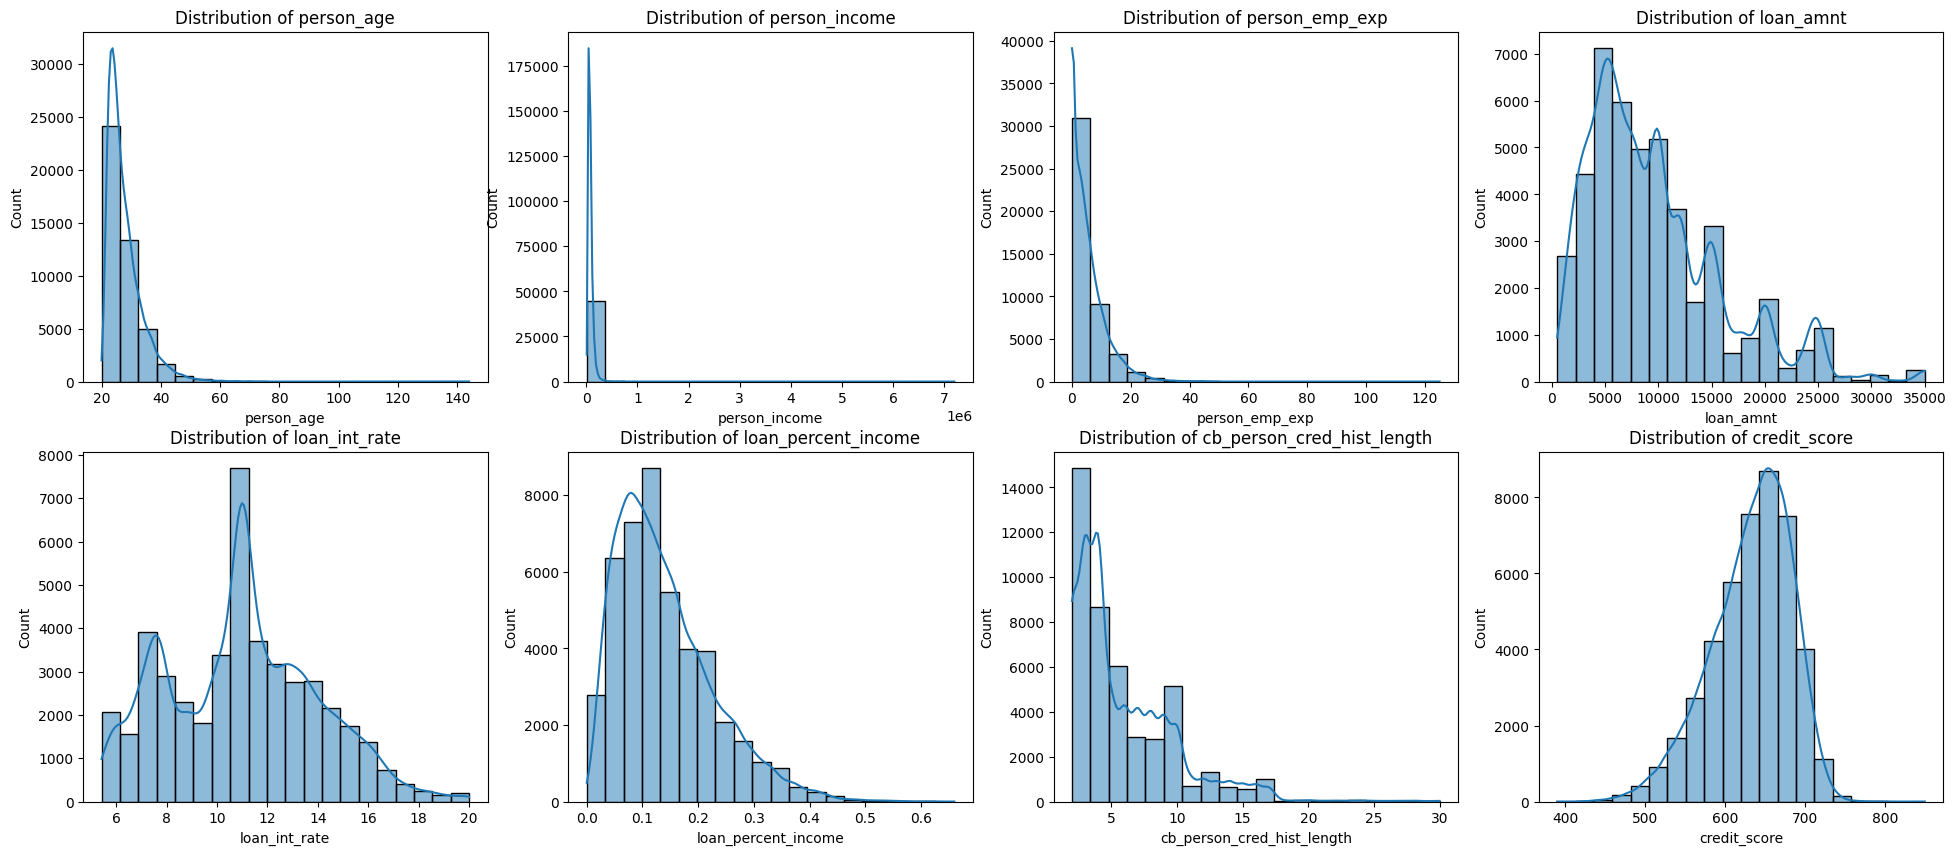

In [ ]:
numerical_columns = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
                     'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
                     'credit_score']

plt.figure(figsize=(24, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 4, i)
    sns.histplot(data[column], kde=True, bins=20)
    plt.title(f'Distribution of {column}')

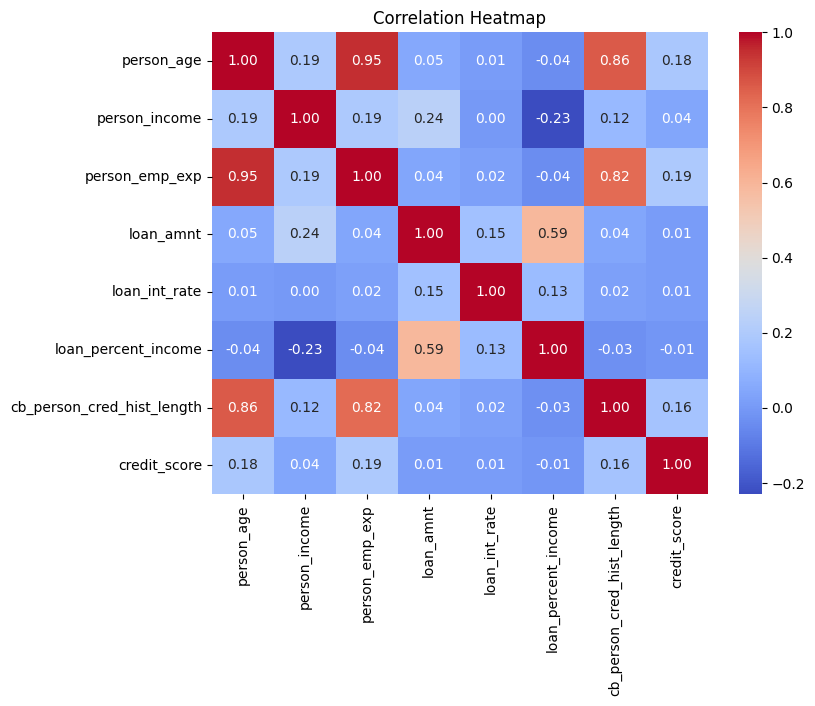

In [ ]:
corr = data[numerical_columns].corr()
corr_rounded = corr.round(2)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_rounded, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

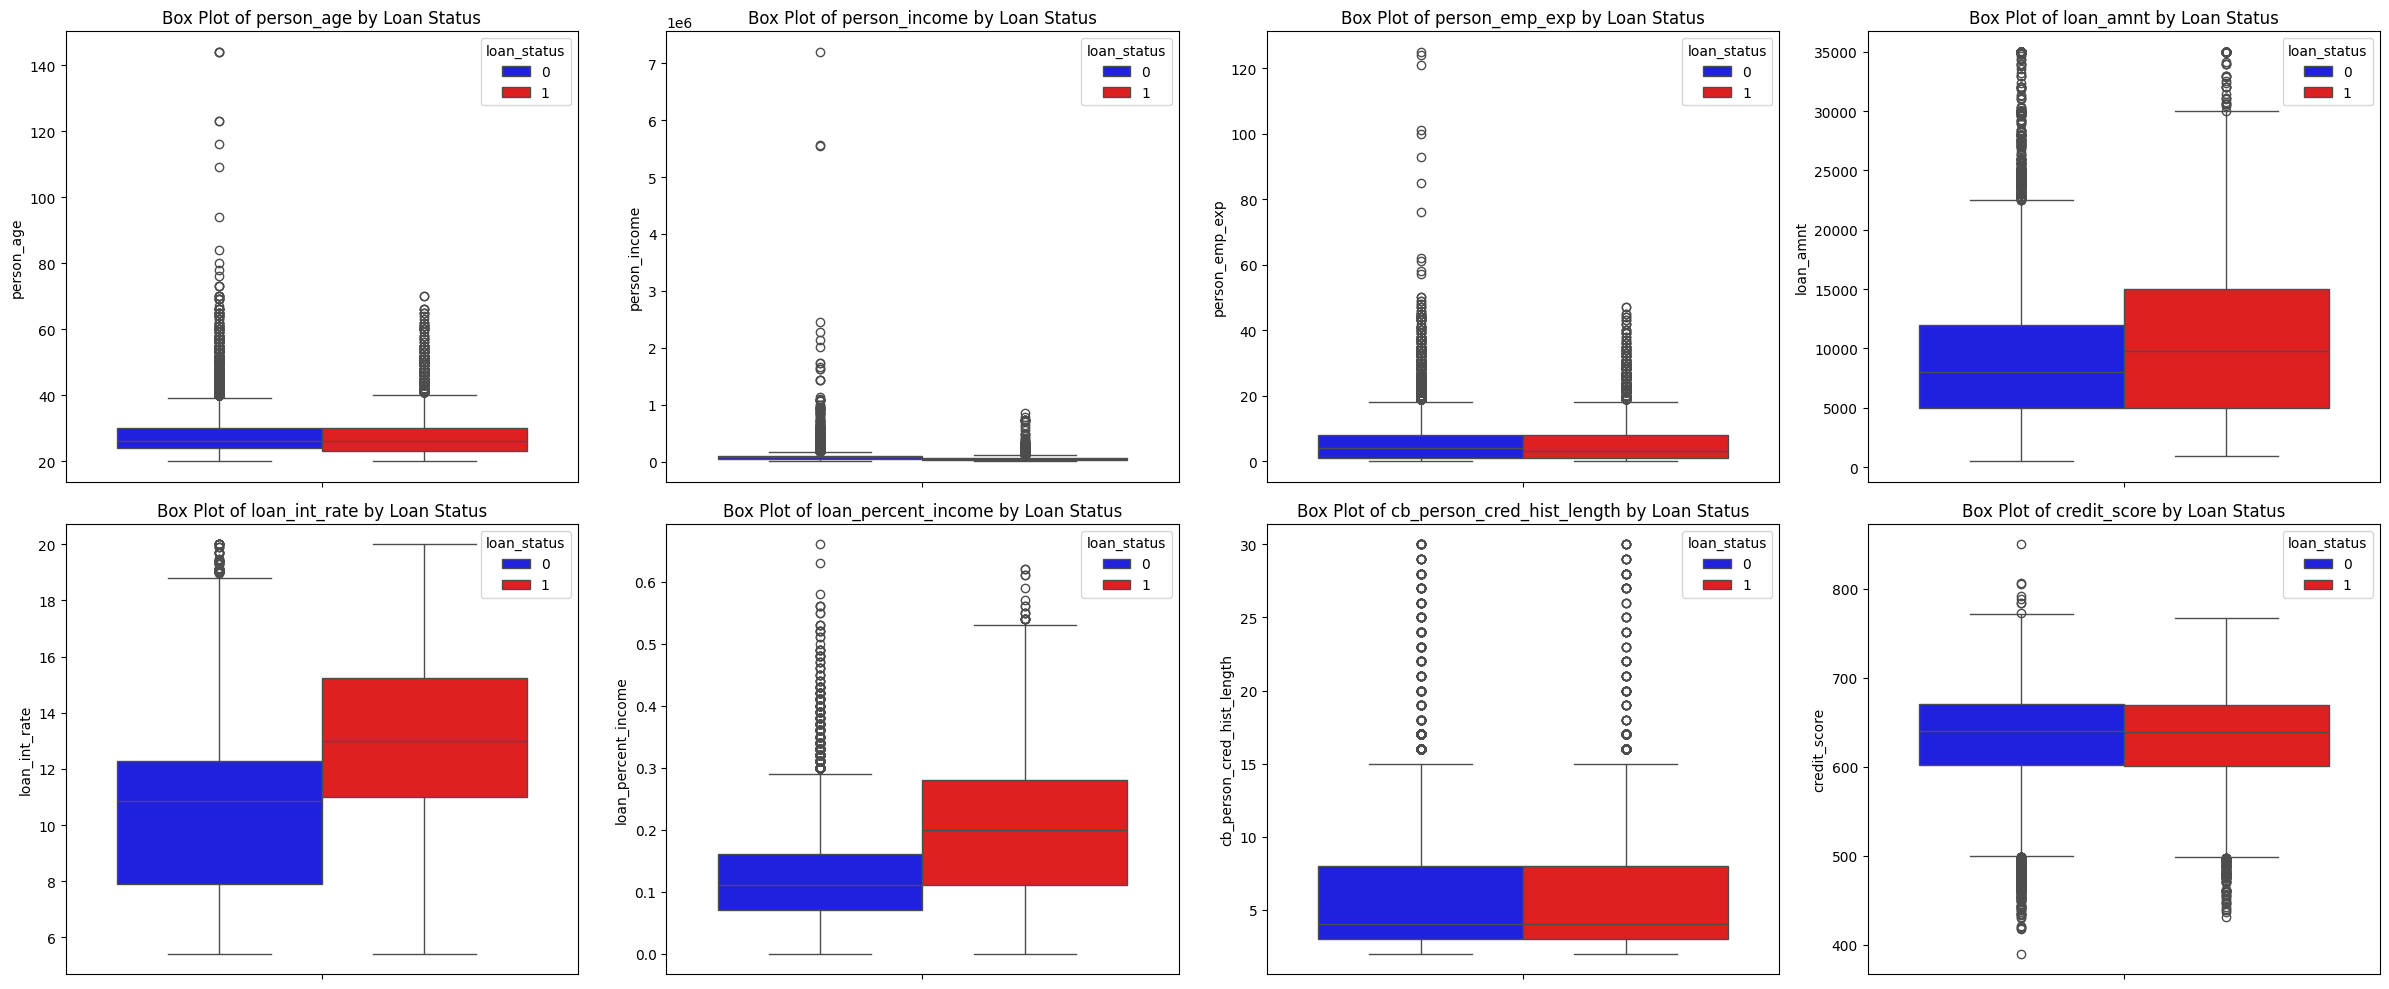

In [ ]:
plt.figure(figsize=(24, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data=data, hue='loan_status', y=column,  palette=['blue', 'red'])
    plt.title(f'Box Plot of {column} by Loan Status')

plt.tight_layout()
plt.show()

In [ ]:
data.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

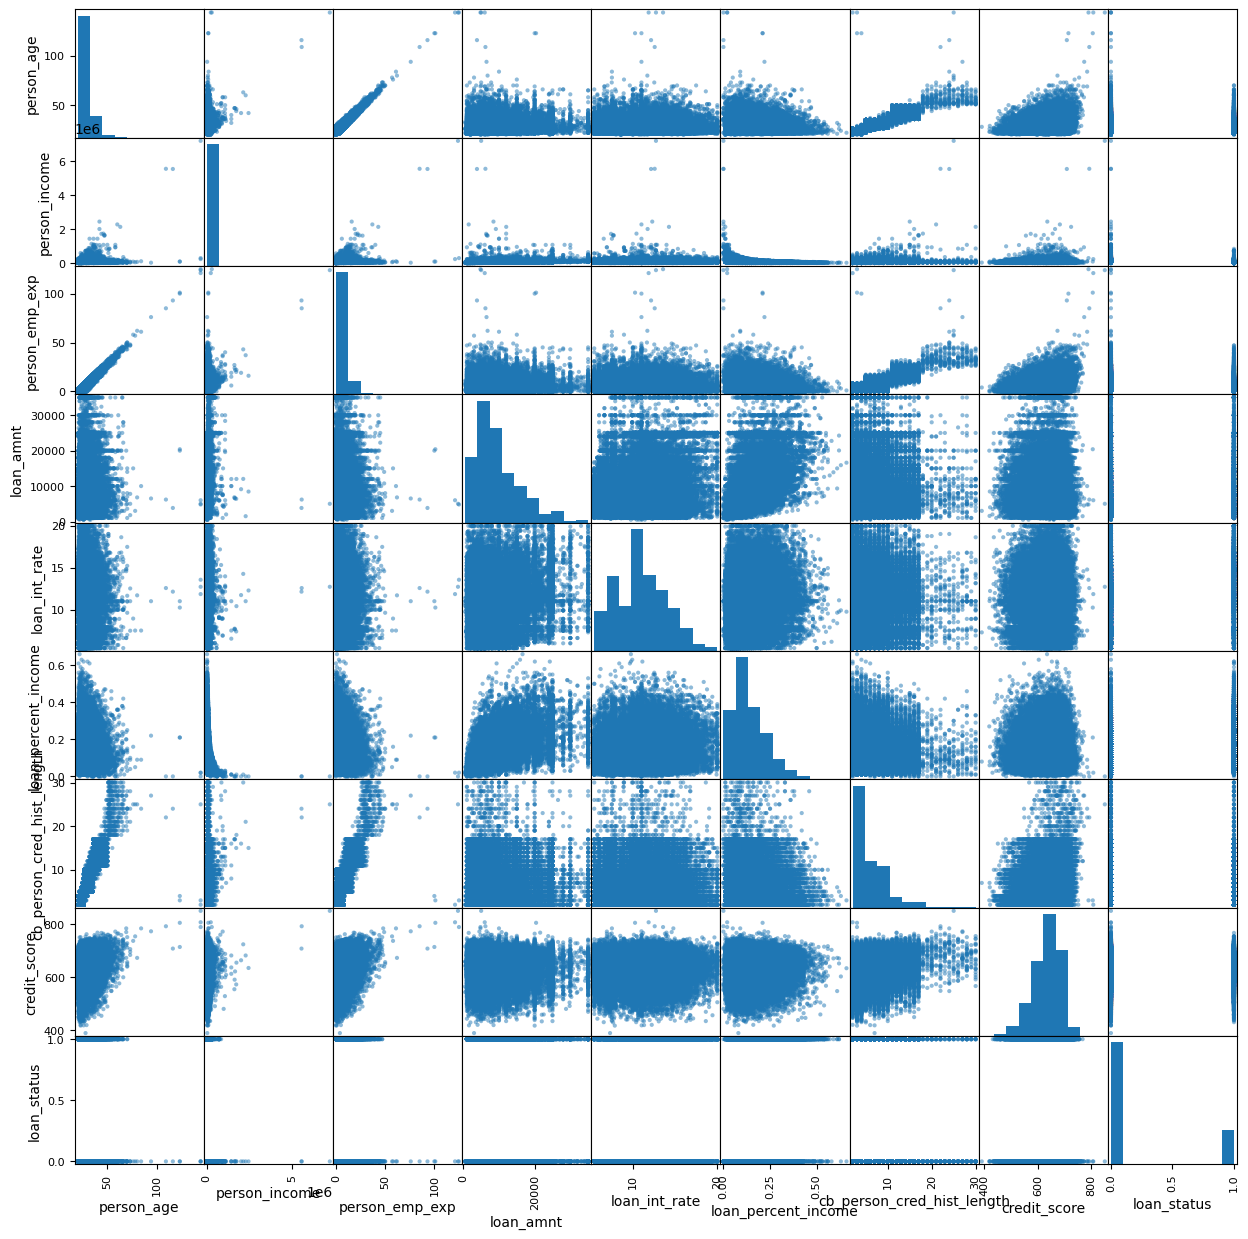

In [ ]:
pd.plotting.scatter_matrix(data, figsize=(15, 15))
plt.show()

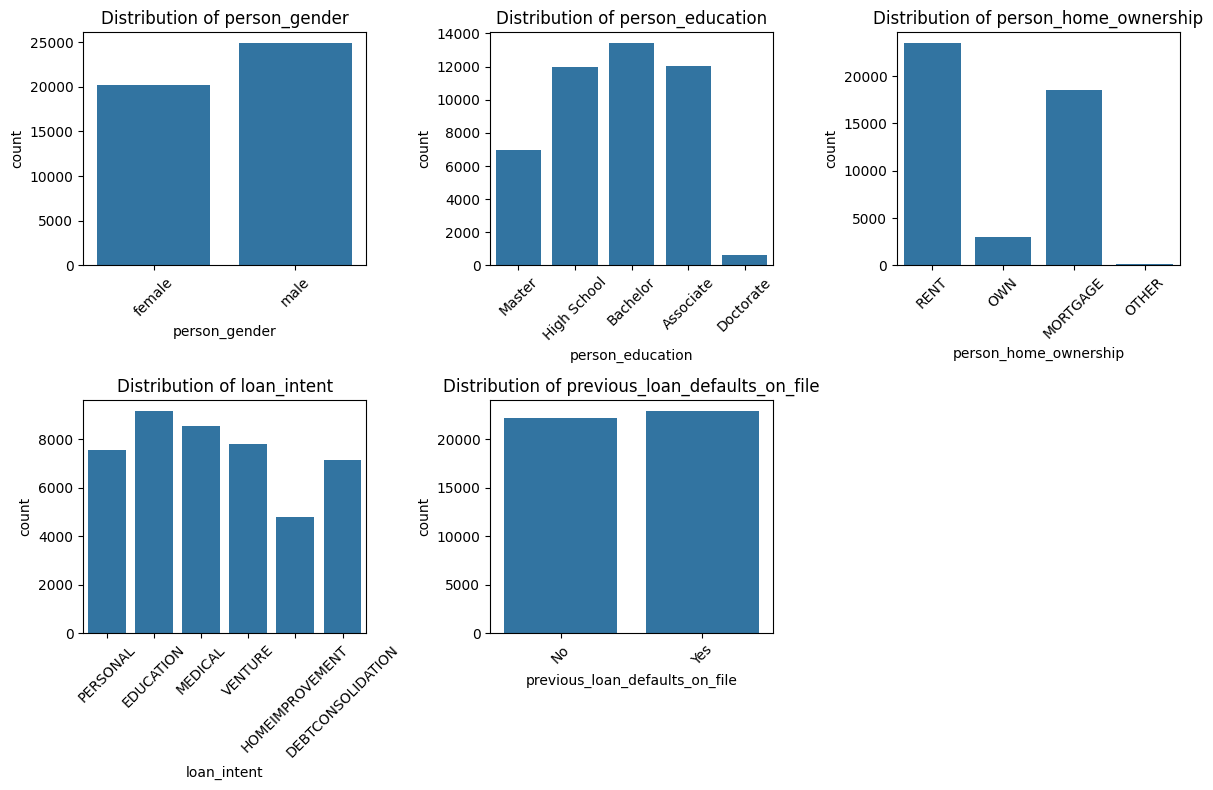

In [ ]:
categorical_columns = ['person_gender', 'person_education', 'person_home_ownership',
                       'loan_intent', 'previous_loan_defaults_on_file']

plt.figure(figsize=(12, 8))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=column, data=data)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

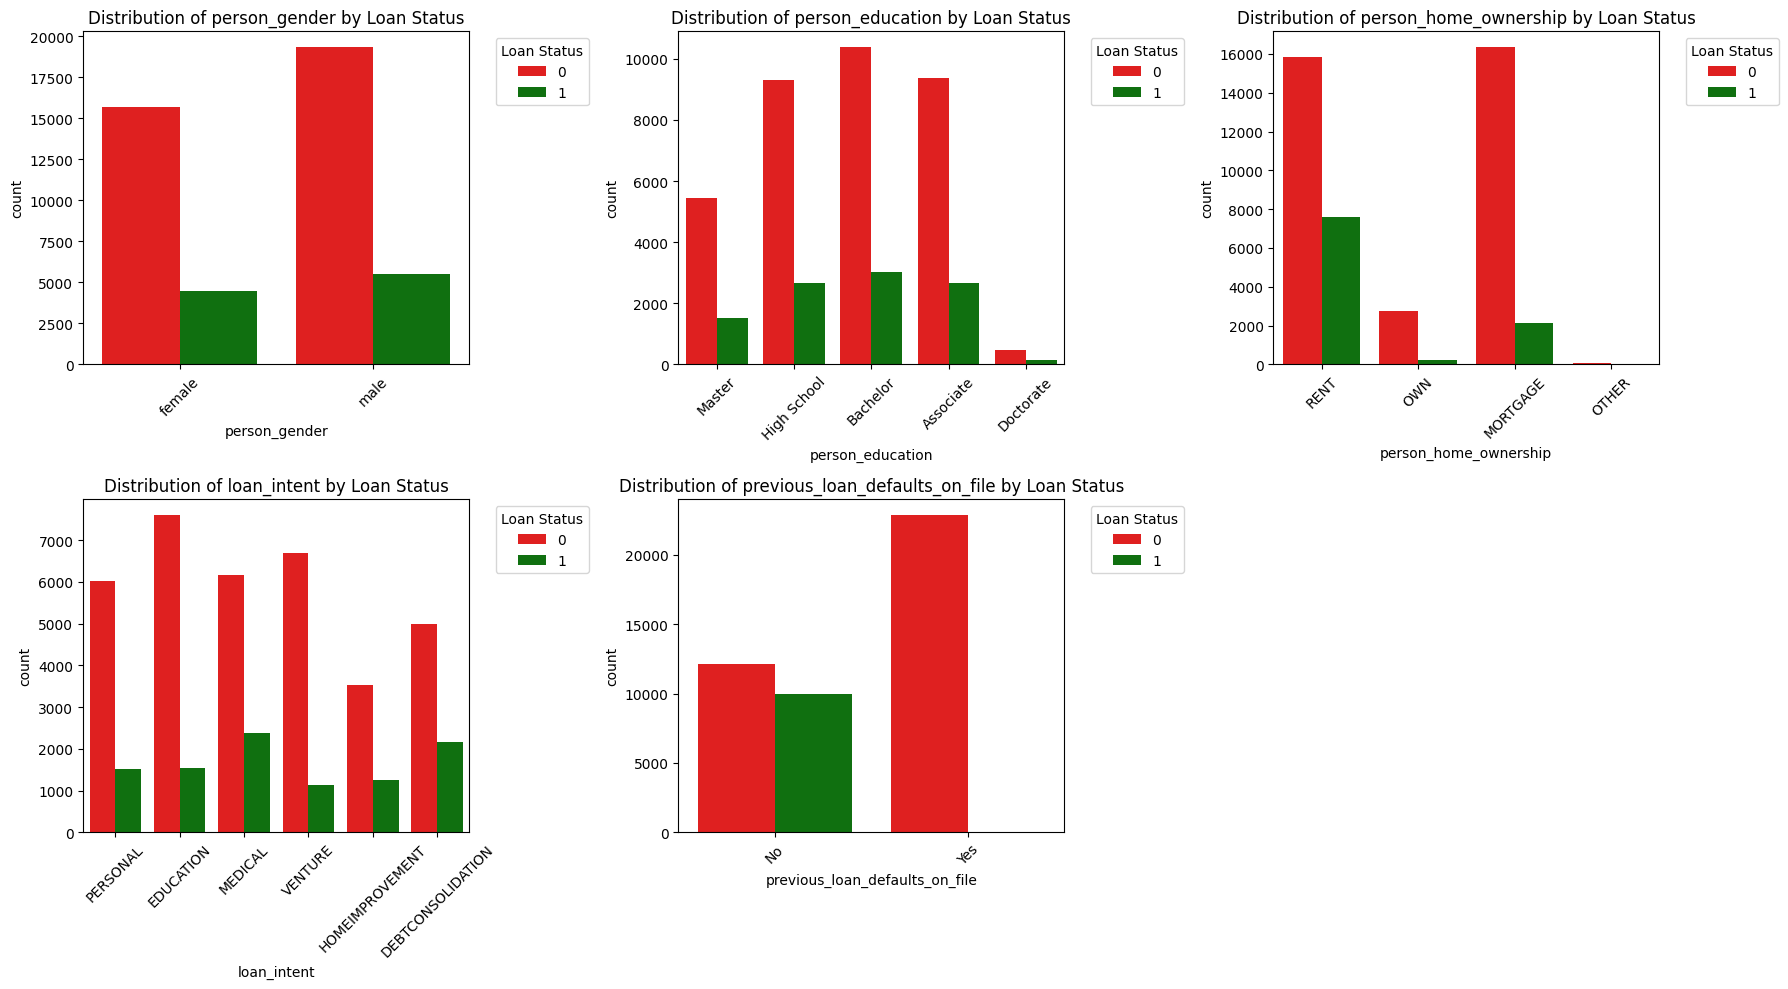

In [ ]:
plt.figure(figsize=(18, 10))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=column, hue='loan_status', data=data, palette={0: 'red', 1: 'green'})
    plt.title(f'Distribution of {column} by Loan Status')
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title='Loan Status')

plt.tight_layout()
plt.show()

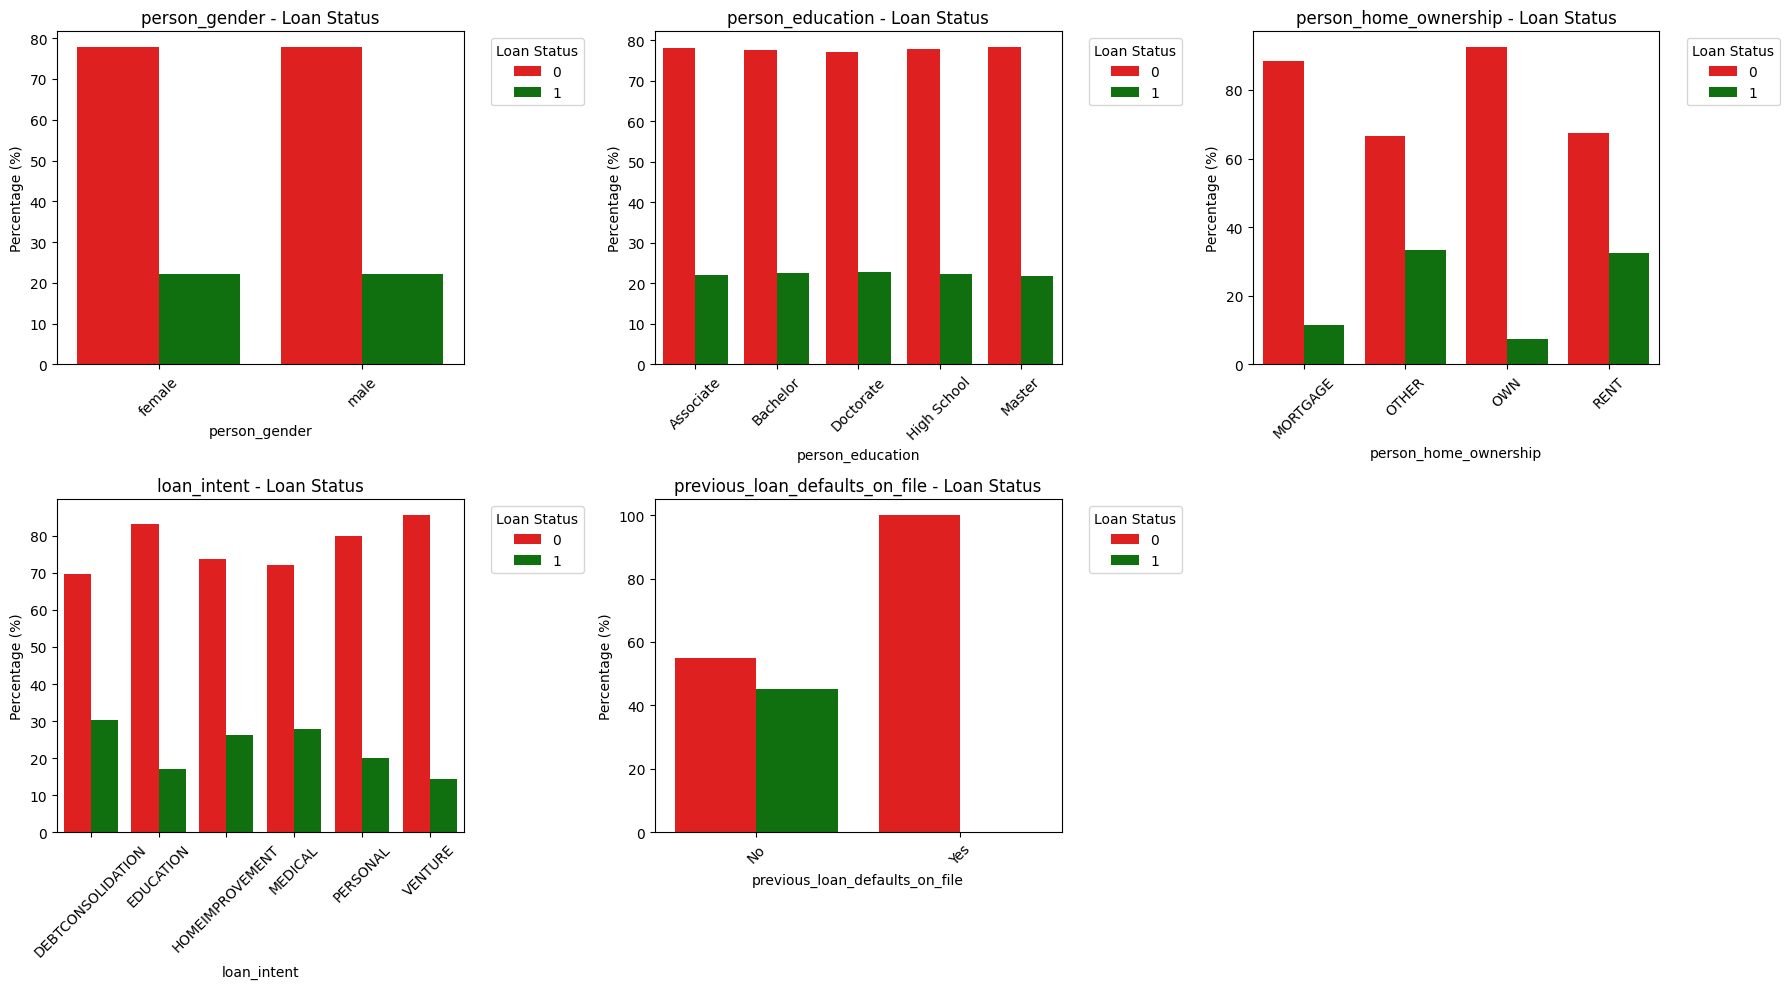

In [ ]:
plt.figure(figsize=(18, 10))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    prop_df = (data.groupby(column)['loan_status']
               .value_counts(normalize=True)
               .mul(100)
               .rename('percentage')
               .reset_index())

    sns.barplot(x=column, y='percentage', hue='loan_status', data=prop_df,
                palette={0: 'red', 1: 'green'})

    plt.title(f'{column} - Loan Status')
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Loan Status')

plt.tight_layout()
plt.show()

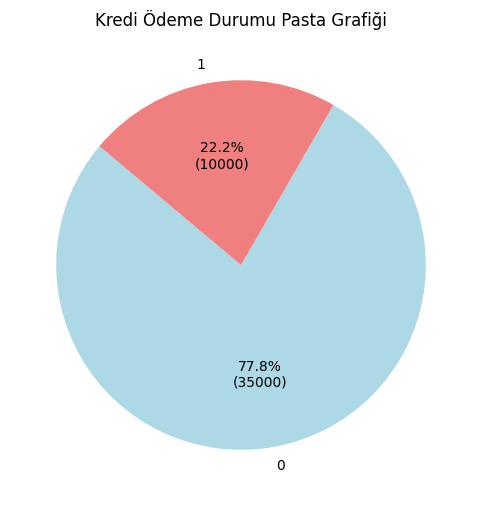

In [ ]:
loan_status_counts = data['loan_status'].value_counts()

def autopct_with_count(pct):
    total = sum(loan_status_counts)
    count = int(round(pct * total / 100.0))
    return f'{pct:.1f}%\n({count})'

plt.figure(figsize=(8, 6))
plt.pie(
    loan_status_counts,
    labels=loan_status_counts.index,
    autopct=autopct_with_count,
    startangle=140,
    colors=['lightblue', 'lightcoral']
)
plt.title('Kredi Ödeme Durumu Pasta Grafiği')
plt.show()

In [ ]:
for column in categorical_columns:
    print(f"Unique values in {column}:")
    print(data[column].unique())
    print("-" * 50)

Unique values in person_gender:
['female' 'male']
--------------------------------------------------
Unique values in person_education:
['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
--------------------------------------------------
Unique values in person_home_ownership:
['RENT' 'OWN' 'MORTGAGE' 'OTHER']
--------------------------------------------------
Unique values in loan_intent:
['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
--------------------------------------------------
Unique values in previous_loan_defaults_on_file:
['No' 'Yes']
--------------------------------------------------


*Label Encoding*
* person_gender -> female:0 - male:1
* person_education ->     'High School':1 - 'Associate':2 - 'Bachelor': 3 - 'Master': 4 - 'Doctorate': 5
* previous_loan_defaults_on_file -> No:0 - Yes:1

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [ ]:
education_mapping = {
    'High School': 1,
    'Associate': 2,
    'Bachelor': 3,
    'Master': 4,
    'Doctorate': 5
}

data['person_education'] = data['person_education'].map(education_mapping)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_columns = ['person_gender', 'previous_loan_defaults_on_file']
label_encoder = LabelEncoder()

for column in label_columns:
    data[column] = label_encoder.fit_transform(data[column])

data = pd.get_dummies(data, columns=['person_home_ownership', 'loan_intent'])

In [ ]:
data.head()

person_age  person_gender  person_education  person_income  person_emp_exp  \
0        22.0              0                 4        71948.0               0   
1        21.0              0                 1        12282.0               0   
2        25.0              0                 1        12438.0               3   
3        23.0              0                 3        79753.0               0   
4        24.0              1                 4        66135.0               1   

   loan_amnt  loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0    35000.0          16.02                 0.49                         3.0   
1     1000.0          11.14                 0.08                         2.0   
2     5500.0          12.87                 0.44                         3.0   
3    35000.0          15.23                 0.44                         2.0   
4    35000.0          14.27                 0.53                         4.0   

   credit_score  ...  person_home_ownership_MORTGAGE  \
0           561  ...                           False   
1           504  ...                           False   
2           635  ...                            True   
3           675  ...                           False   
4           586  ...                           False   

   person_home_ownership_OTHER  person_home_ownership_OWN  \
0                        False                      False   
1                        False                       True   
2                        False                      False   
3                        False                      False   
4                        False                      False   

   person_home_ownership_RENT  loan_intent_DEBTCONSOLIDATION  \
0                        True                          False   
1                       False                          False   
2                       False                          False   
3                        True                          False   
4                        True                          False   

   loan_intent_EDUCATION  loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  \
0                  False                        False                False   
1                   True                        False                False   
2                  False                        False                 True   
3                  False                        False                 True   
4                  False                        False                 True   

   loan_intent_PERSONAL  loan_intent_VENTURE  
0                  True                False  
1                 False                False  
2                 False                False  
3                 False                False  
4                 False                False  

[5 rows x 22 columns]

In [ ]:
data_reg = data.copy()

# Verilerin Eğitim - Test Olarak Ayrılması ve Karar Ağacının Eğitilmesi

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.tree import plot_tree

In [ ]:
y = data['loan_status']
X = data.drop('loan_status', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
x_pred = model.predict(X_train)

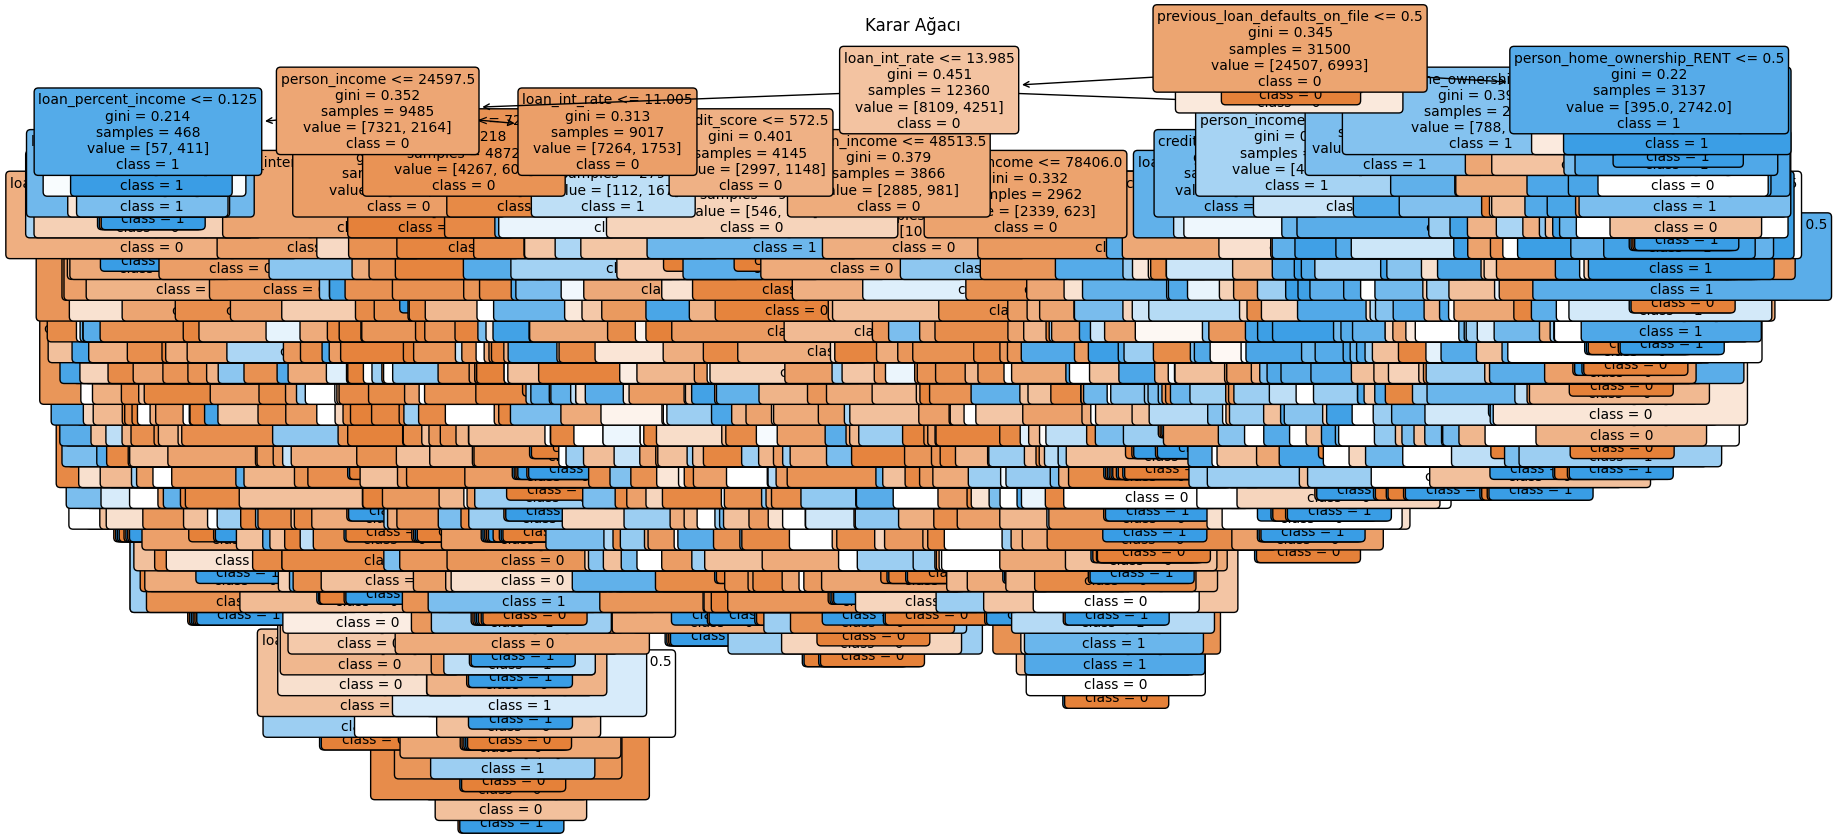

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(
    model,
    filled=True,
    feature_names=X_train.columns,
    class_names=['0', '1'],
    rounded=True,
    fontsize=10
)
plt.title("Karar Ağacı")
plt.show()

In [ ]:
n_nodes = model.tree_.node_count
n_leaves = model.tree_.n_leaves
max_depth = model.tree_.max_depth

print(f"Toplam Düğüm Sayısı: {n_nodes}")
print(f"Yaprak Düğüm Sayısı: {n_leaves}")
print(f"Maksimum Derinlik: {max_depth}")

Toplam Düğüm Sayısı: 3861
Yaprak Düğüm Sayısı: 1931
Maksimum Derinlik: 36


### Özellik önem dereceleri

In [ ]:
importances = model.feature_importances_

for feature_name, importance in zip(X_train.columns, importances):
    print(f"{feature_name}: {importance:.4f}")

person_age: 0.0270
person_gender: 0.0054
person_education: 0.0115
person_income: 0.1286
person_emp_exp: 0.0190
loan_amnt: 0.0323
loan_int_rate: 0.1622
loan_percent_income: 0.1578
cb_person_cred_hist_length: 0.0209
credit_score: 0.0539
previous_loan_defaults_on_file: 0.2947
person_home_ownership_MORTGAGE: 0.0039
person_home_ownership_OTHER: 0.0000
person_home_ownership_OWN: 0.0111
person_home_ownership_RENT: 0.0320
loan_intent_DEBTCONSOLIDATION: 0.0086
loan_intent_EDUCATION: 0.0024
loan_intent_HOMEIMPROVEMENT: 0.0079
loan_intent_MEDICAL: 0.0091
loan_intent_PERSONAL: 0.0048
loan_intent_VENTURE: 0.0070


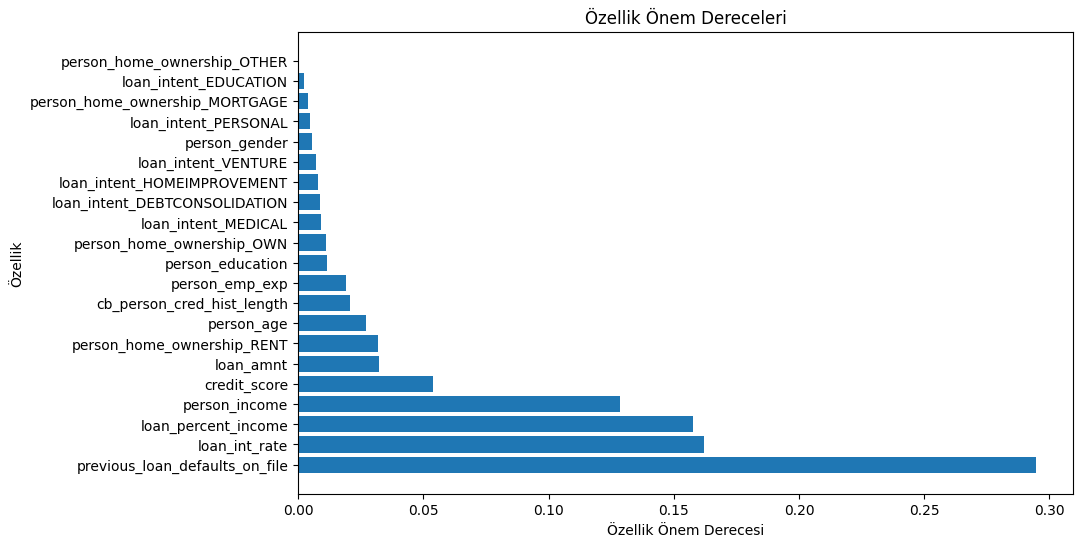

In [ ]:
feature_importance_dict = dict(zip(X_train.columns, importances))

sorted_feature_importance = dict(sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True))

features = list(sorted_feature_importance.keys())
importances = list(sorted_feature_importance.values())

plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel('Özellik Önem Derecesi')
plt.ylabel('Özellik')
plt.title('Özellik Önem Dereceleri')
plt.show()


### Performans Metirkleri

**Doğruluk Değeri** Doğru sınıfa yerleştirilenlerin oranı

In [ ]:
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, x_pred)
print("Test Verisi Doğruluğu:", accuracy_test)
print("Train Verisi Doğruluğu:", accuracy_train)


Test Verisi Doğruluğu: 0.9005185185185185
Train Verisi Doğruluğu: 1.0


**Karmaşıklık Matrisi**

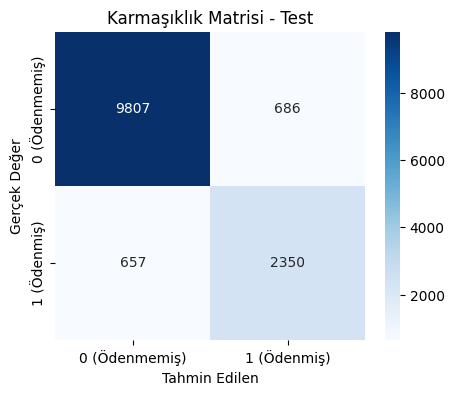

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0 (Ödenmemiş)", "1 (Ödenmiş)"],
            yticklabels=["0 (Ödenmemiş)", "1 (Ödenmiş)"])
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Değer")
plt.title("Karmaşıklık Matrisi - Test")
plt.show()

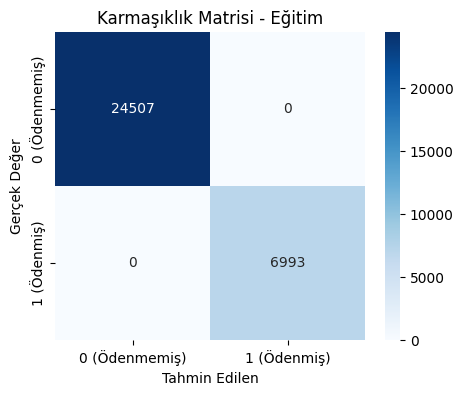

In [ ]:
cm = confusion_matrix(y_train, x_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0 (Ödenmemiş)", "1 (Ödenmiş)"],
            yticklabels=["0 (Ödenmemiş)", "1 (Ödenmiş)"])
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Değer")
plt.title("Karmaşıklık Matrisi - Eğitim")
plt.show()

**F1 Testi** Sınıflar dengesiz olduğu için weighted kullanılmıştır

In [ ]:
f1_test = f1_score(y_test, y_pred, average='weighted')
f1_train = f1_score(y_train, x_pred, average='weighted')
print("Test İçin F1 Skoru:", f1_test)
print("Train İçin F1 Skoru:", f1_train)

Test İçin F1 Skoru: 0.9006883908617519
Train İçin F1 Skoru: 1.0


**Precision** Precision değeri doğru pozitif tahminlerin ne kadarının gerçekten doğru olduğunu göstermektedir

In [ ]:
precision_test = precision_score(y_test, y_pred, average='weighted')
precision_train = precision_score(y_train, x_pred, average='weighted')
print("Test İçin Precision:", precision_test)
print("Train İçin Precision :", precision_train)

Test İçin Precision: 0.9008690286445987
Train İçin Precision : 1.0


**Recall** Recall değeri doğru pozitif tahminlerin gerçek toplam pozitif tahminlere oranını vermektedir

In [ ]:
recall_test = recall_score(y_test, y_pred, average='weighted')
recall_train = recall_score(y_train, x_pred, average='weighted')
print("Test İçin Recall:", recall_test)
print("Train İçin Recall :", recall_train)

Test İçin Recall: 0.9005185185185185
Train İçin Recall : 1.0


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94     10493
           1       0.77      0.78      0.78      3007

    accuracy                           0.90     13500
   macro avg       0.86      0.86      0.86     13500
weighted avg       0.90      0.90      0.90     13500



**ROC Curve ve AUC**

In [ ]:
y_pred_proba_test = model.predict_proba(X_test)
x_pred_proba_train = model.predict_proba(X_train)
y_pred_proba_test = y_pred_proba_test[:, 1]
x_pred_proba_train = x_pred_proba_train[:, 1]

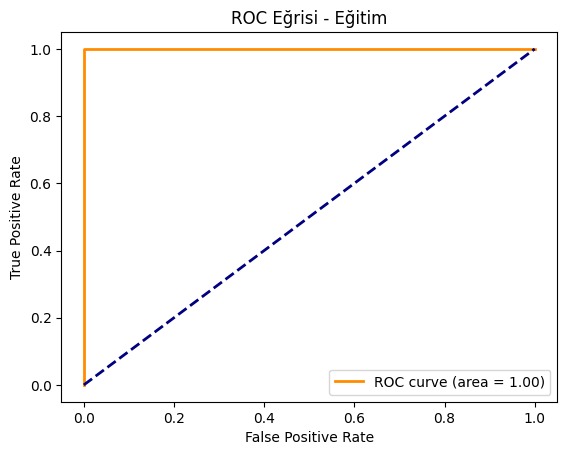

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train, x_pred_proba_train)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi - Eğitim')
plt.legend(loc="lower right")
plt.show()

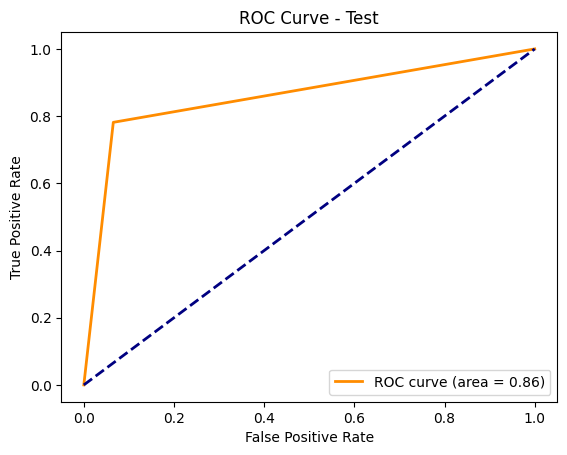

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_test)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Rastgele tahmin çizgisi
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi - Test')
plt.legend(loc="lower right")
plt.show()

Derinliği çok ve karmaşıklığı yüksektir. Bu nedenle overfit etmiştir. Train verisini ezberlediği derinliği kısıtlanacaktır.

## İdeal Derinliğin bulunması

In [ ]:
def evaluate_model(max_depth, X_train, y_train, X_test, y_test):
    model = DecisionTreeClassifier(max_depth=max_depth)
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    return {
        'test_accuracy': accuracy_score(y_test, y_pred_test),
        'test_precision': precision_score(y_test, y_pred_test, average='weighted'),
        'train_accuracy': accuracy_score(y_train, y_pred_train),
        'train_precision': precision_score(y_train, y_pred_train, average='weighted')
    }

# Değerlendirme
depth_accuracy_dict_test = {'Depth': [], 'Test Accuracy': [], 'Test Precision': []}
depth_accuracy_dict_train = {'Depth': [], 'Train Accuracy': [], 'Train Precision': []}

for i in range(1, 40):
    metrics = evaluate_model(i, X_train, y_train, X_test, y_test)
    depth_accuracy_dict_test['Depth'].append(i)
    depth_accuracy_dict_test['Test Accuracy'].append(metrics['test_accuracy'])
    depth_accuracy_dict_test['Test Precision'].append(metrics['test_precision'])
    depth_accuracy_dict_train['Depth'].append(i)
    depth_accuracy_dict_train['Train Accuracy'].append(metrics['train_accuracy'])
    depth_accuracy_dict_train['Train Precision'].append(metrics['train_precision'])

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


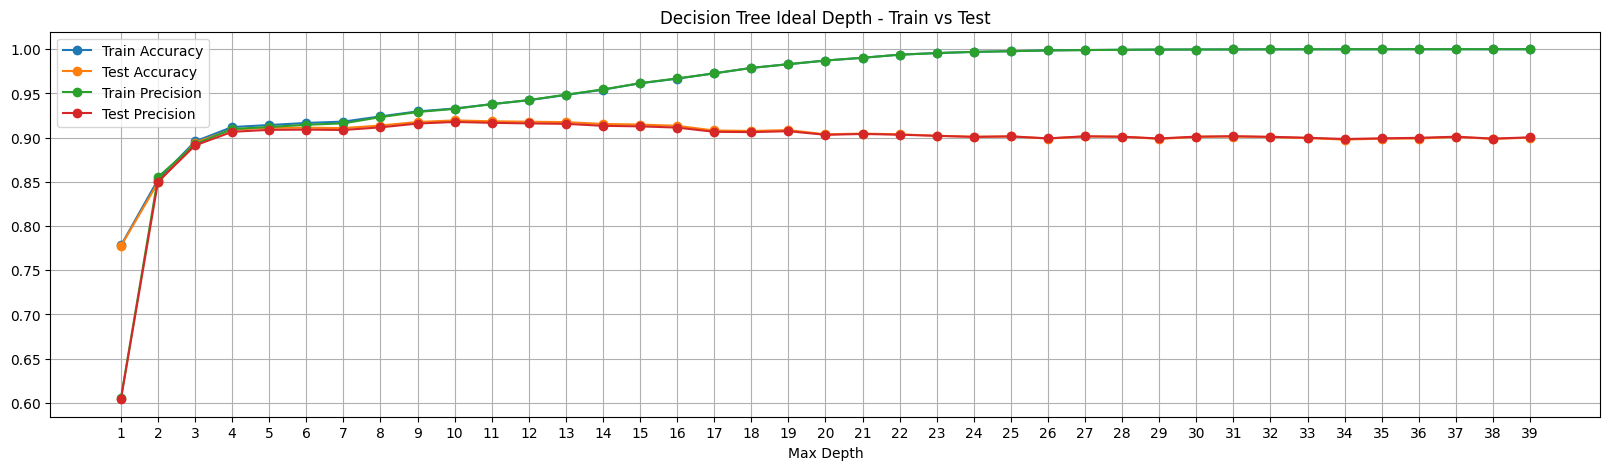

In [ ]:
plt.figure(figsize=(20, 5))
plt.title('Decision Tree Ideal Depth - Train vs Test')
plt.xlabel('Max Depth')
plt.xticks(range(1, 40))
plt.grid(True)
plt.plot(depth_accuracy_dict_train['Depth'], depth_accuracy_dict_train['Train Accuracy'], marker='o', label='Train Accuracy')
plt.plot(depth_accuracy_dict_test['Depth'], depth_accuracy_dict_test['Test Accuracy'], marker='o', label='Test Accuracy')
plt.plot(depth_accuracy_dict_train['Depth'], depth_accuracy_dict_train['Train Precision'], marker='o', label='Train Precision')
plt.plot(depth_accuracy_dict_test['Depth'], depth_accuracy_dict_test['Test Precision'], marker='o', label='Test Precision')
plt.legend()
plt.show()

In [ ]:
max_test_accuracy = max(depth_accuracy_dict_test['Test Accuracy'])
best_depth = depth_accuracy_dict_test['Depth'][depth_accuracy_dict_test['Test Accuracy'].index(max_test_accuracy)]

print(f"En yüksek test doğruluğu: {max_test_accuracy:.4f}")
print(f"Bu doğruluğa karşılık gelen derinlik: {best_depth}")

En yüksek test doğruluğu: 0.9195
Bu doğruluğa karşılık gelen derinlik: 10


## Modelin en iyi derinlik parametresi ile yeniden eğitilmesi

In [ ]:
model = DecisionTreeClassifier(random_state=42, max_depth=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
x_pred = model.predict(X_train)

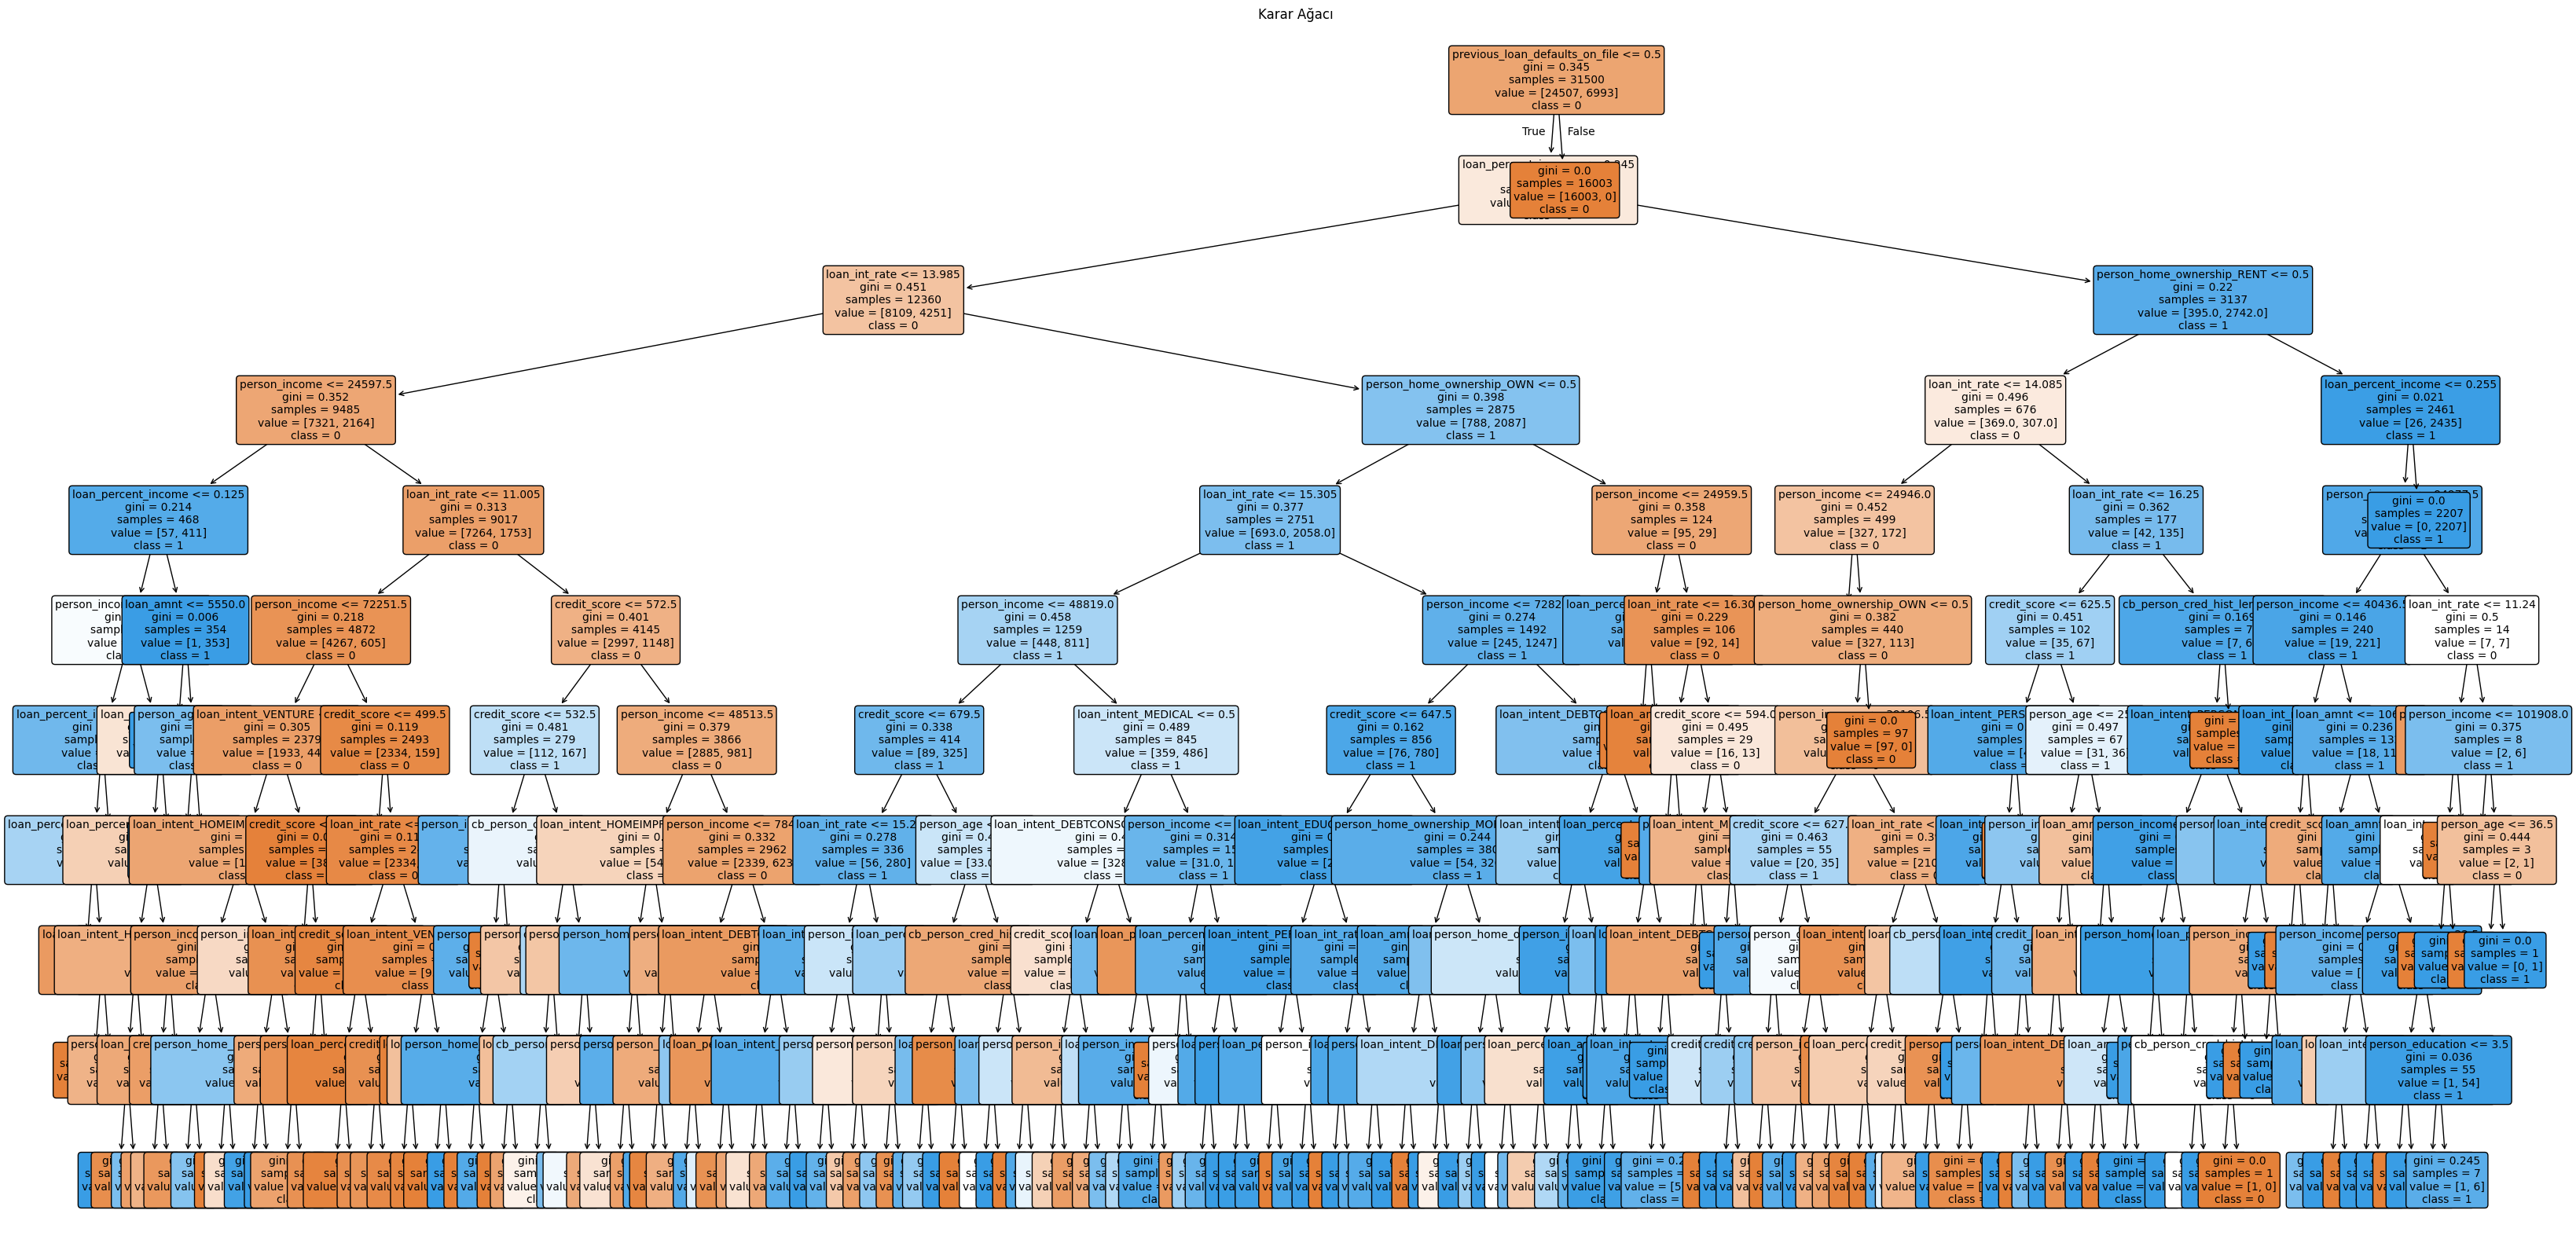

In [ ]:
plt.figure(figsize=(40, 20))
plot_tree(
    model,
    filled=True,
    feature_names=X_train.columns,
    class_names=['0', '1'],
    rounded=True,
    fontsize=10
)
plt.title("Karar Ağacı")
plt.show()

In [ ]:
n_nodes = model.tree_.node_count
n_leaves = model.tree_.n_leaves
max_depth = model.tree_.max_depth

print(f"Toplam Düğüm Sayısı: {n_nodes}")
print(f"Yaprak Düğüm Sayısı: {n_leaves}")
print(f"Maksimum Derinlik: {max_depth}")

Toplam Düğüm Sayısı: 379
Yaprak Düğüm Sayısı: 190
Maksimum Derinlik: 10


person_age: 0.0030
person_gender: 0.0000
person_education: 0.0000
person_income: 0.1161
person_emp_exp: 0.0005
loan_amnt: 0.0047
loan_int_rate: 0.1722
loan_percent_income: 0.1876
cb_person_cred_hist_length: 0.0018
credit_score: 0.0212
previous_loan_defaults_on_file: 0.4068
person_home_ownership_MORTGAGE: 0.0024
person_home_ownership_OTHER: 0.0000
person_home_ownership_OWN: 0.0144
person_home_ownership_RENT: 0.0406
loan_intent_DEBTCONSOLIDATION: 0.0074
loan_intent_EDUCATION: 0.0000
loan_intent_HOMEIMPROVEMENT: 0.0067
loan_intent_MEDICAL: 0.0081
loan_intent_PERSONAL: 0.0005
loan_intent_VENTURE: 0.0061


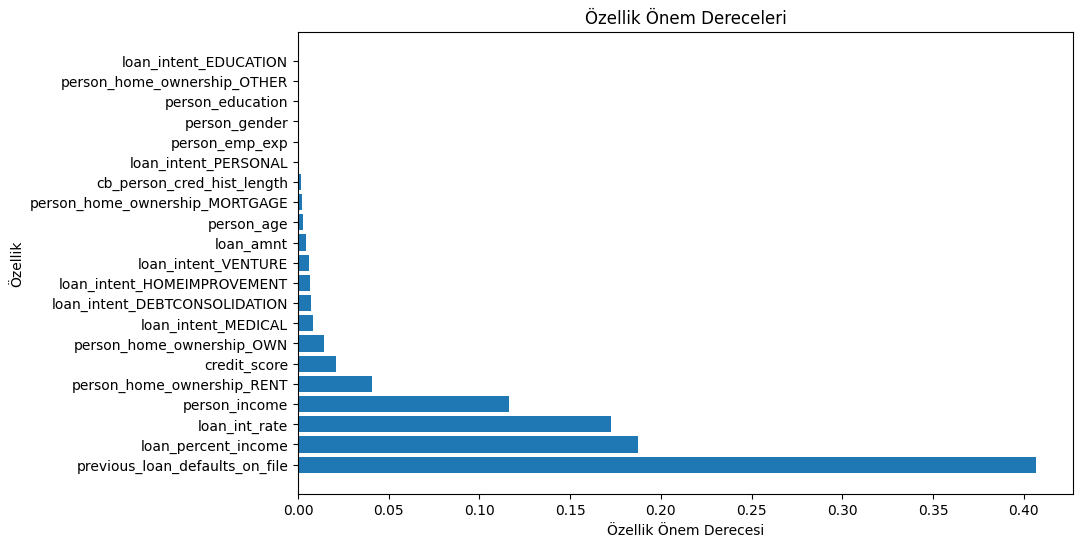

In [ ]:
importances = model.feature_importances_

for feature_name, importance in zip(X_train.columns, importances):
    print(f"{feature_name}: {importance:.4f}")

feature_importance_dict = dict(zip(X_train.columns, importances))

sorted_feature_importance = dict(sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True))

features = list(sorted_feature_importance.keys())
importances = list(sorted_feature_importance.values())

plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel('Özellik Önem Derecesi')
plt.ylabel('Özellik')
plt.title('Özellik Önem Dereceleri')
plt.show()

In [ ]:
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, x_pred)
print("Test Verisi Doğruluğu:", accuracy_test)
print("Train Verisi Doğruluğu:", accuracy_train)
f1_test = f1_score(y_test, y_pred, average='weighted')
f1_train = f1_score(y_train, x_pred, average='weighted')
print("Test İçin F1 Skoru:", f1_test)
print("Train İçin F1 Skoru:", f1_train)
precision_test = precision_score(y_test, y_pred, average='weighted')
precision_train = precision_score(y_train, x_pred, average='weighted')
print("Test İçin Precision:", precision_test)
print("Train İçin Precision :", precision_train)
recall_test = recall_score(y_test, y_pred, average='weighted')
recall_train = recall_score(y_train, x_pred, average='weighted')
print("Test İçin Recall:", recall_test)
print("Train İçin Recall :", recall_train)

Test Verisi Doğruluğu: 0.9194074074074075
Train Verisi Doğruluğu: 0.932952380952381
Test İçin F1 Skoru: 0.9168497224225346
Train İçin F1 Skoru: 0.9305002928695087
Test İçin Precision: 0.9176523252552176
Train İçin Precision : 0.9325575466347126
Test İçin Recall: 0.9194074074074075
Train İçin Recall : 0.932952380952381


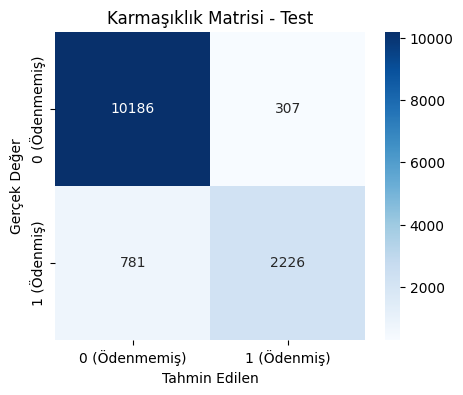

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0 (Ödenmemiş)", "1 (Ödenmiş)"],
            yticklabels=["0 (Ödenmemiş)", "1 (Ödenmiş)"])
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Değer")
plt.title("Karmaşıklık Matrisi - Test")
plt.show()

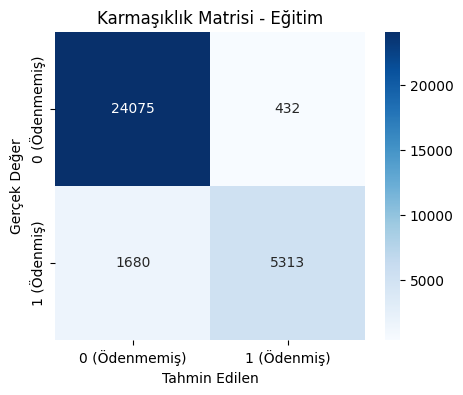

In [ ]:
cm = confusion_matrix(y_train, x_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0 (Ödenmemiş)", "1 (Ödenmiş)"],
            yticklabels=["0 (Ödenmemiş)", "1 (Ödenmiş)"])
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Değer")
plt.title("Karmaşıklık Matrisi - Eğitim")
plt.show()

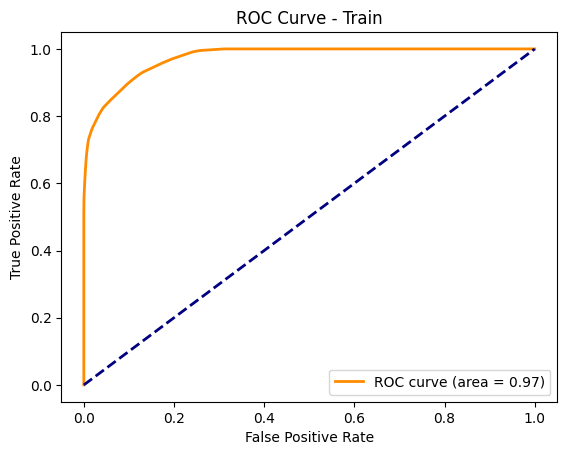

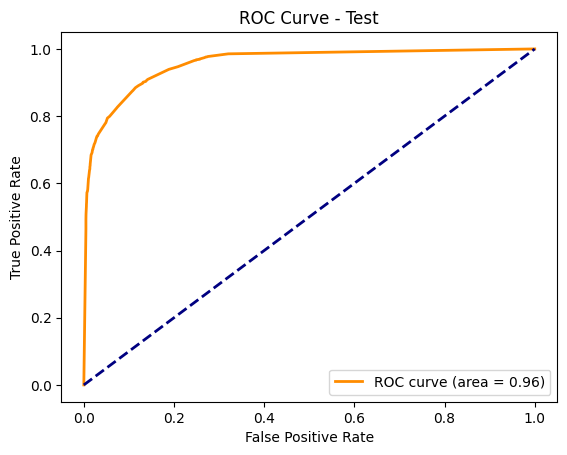

In [ ]:
y_pred_proba_test = model.predict_proba(X_test)
x_pred_proba_train = model.predict_proba(X_train)
y_pred_proba_test = y_pred_proba_test[:, 1]
x_pred_proba_train = x_pred_proba_train[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, x_pred_proba_train)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Train')
plt.legend(loc="lower right")
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_test)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test')
plt.legend(loc="lower right")
plt.show()

In [ ]:
param_grid = {
    'max_depth': [None, 10,  20,  30],
    'min_samples_split': [2, 10, 20, 50],
    'min_samples_leaf': [1, 5, 20],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
    'max_leaf_nodes': [None, 20, 50, 100, 200],
    'max_features': [None, 'sqrt', 'log2', 0.5, 0.8],
    'ccp_alpha': [0.0, 0.01, 0.02, 0.05]
}

# Karar ağacı modelini oluştur
model = DecisionTreeClassifier(random_state=42)

# Grid Search uygula
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose = 2
)

# Grid Search'i eğitim verisi üzerinde çalıştır
grid_search.fit(X_train, y_train)
print("En iyi hiperparametreler:", grid_search.best_params_)
print("En iyi doğruluk skoru (eğitim):", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test doğruluk skoru:", test_accuracy)

## Random Search sonucu bulunan en iyi parametreler

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'max_depth': [None] + list(np.arange(5, 50, 5)),
    'min_samples_split': np.arange(2, 50, 5),
    'min_samples_leaf': np.arange(1, 20, 2),
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
    'max_leaf_nodes': [None] + list(np.arange(10, 200, 20)),
    'max_features': [None, 'sqrt', 'log2', 0.5, 0.8],
    'ccp_alpha': np.linspace(0, 0.05, 10)
}

# Karar ağacı modelini oluştur
model = DecisionTreeClassifier(random_state=42)

# Randomized Search uygula
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=50,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_train)

print("En iyi hiperparametreler:", random_search.best_params_)
print("En iyi doğruluk skoru (eğitim):", random_search.best_score_)

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test doğruluk skoru:", test_accuracy)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
En iyi hiperparametreler: {'min_weight_fraction_leaf': 0.0, 'min_samples_split': np.int64(42), 'min_samples_leaf': np.int64(3), 'max_leaf_nodes': np.int64(130), 'max_features': None, 'max_depth': np.int64(25), 'ccp_alpha': np.float64(0.0)}
En iyi doğruluk skoru (eğitim): 0.9175238095238095
Test doğruluk skoru: 0.9226666666666666


In [ ]:
model = DecisionTreeClassifier(random_state=42, max_depth=25, min_samples_split=42, min_weight_fraction_leaf=0,min_samples_leaf=3, max_leaf_nodes=130, max_features= None, ccp_alpha=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
x_pred = model.predict(X_train)


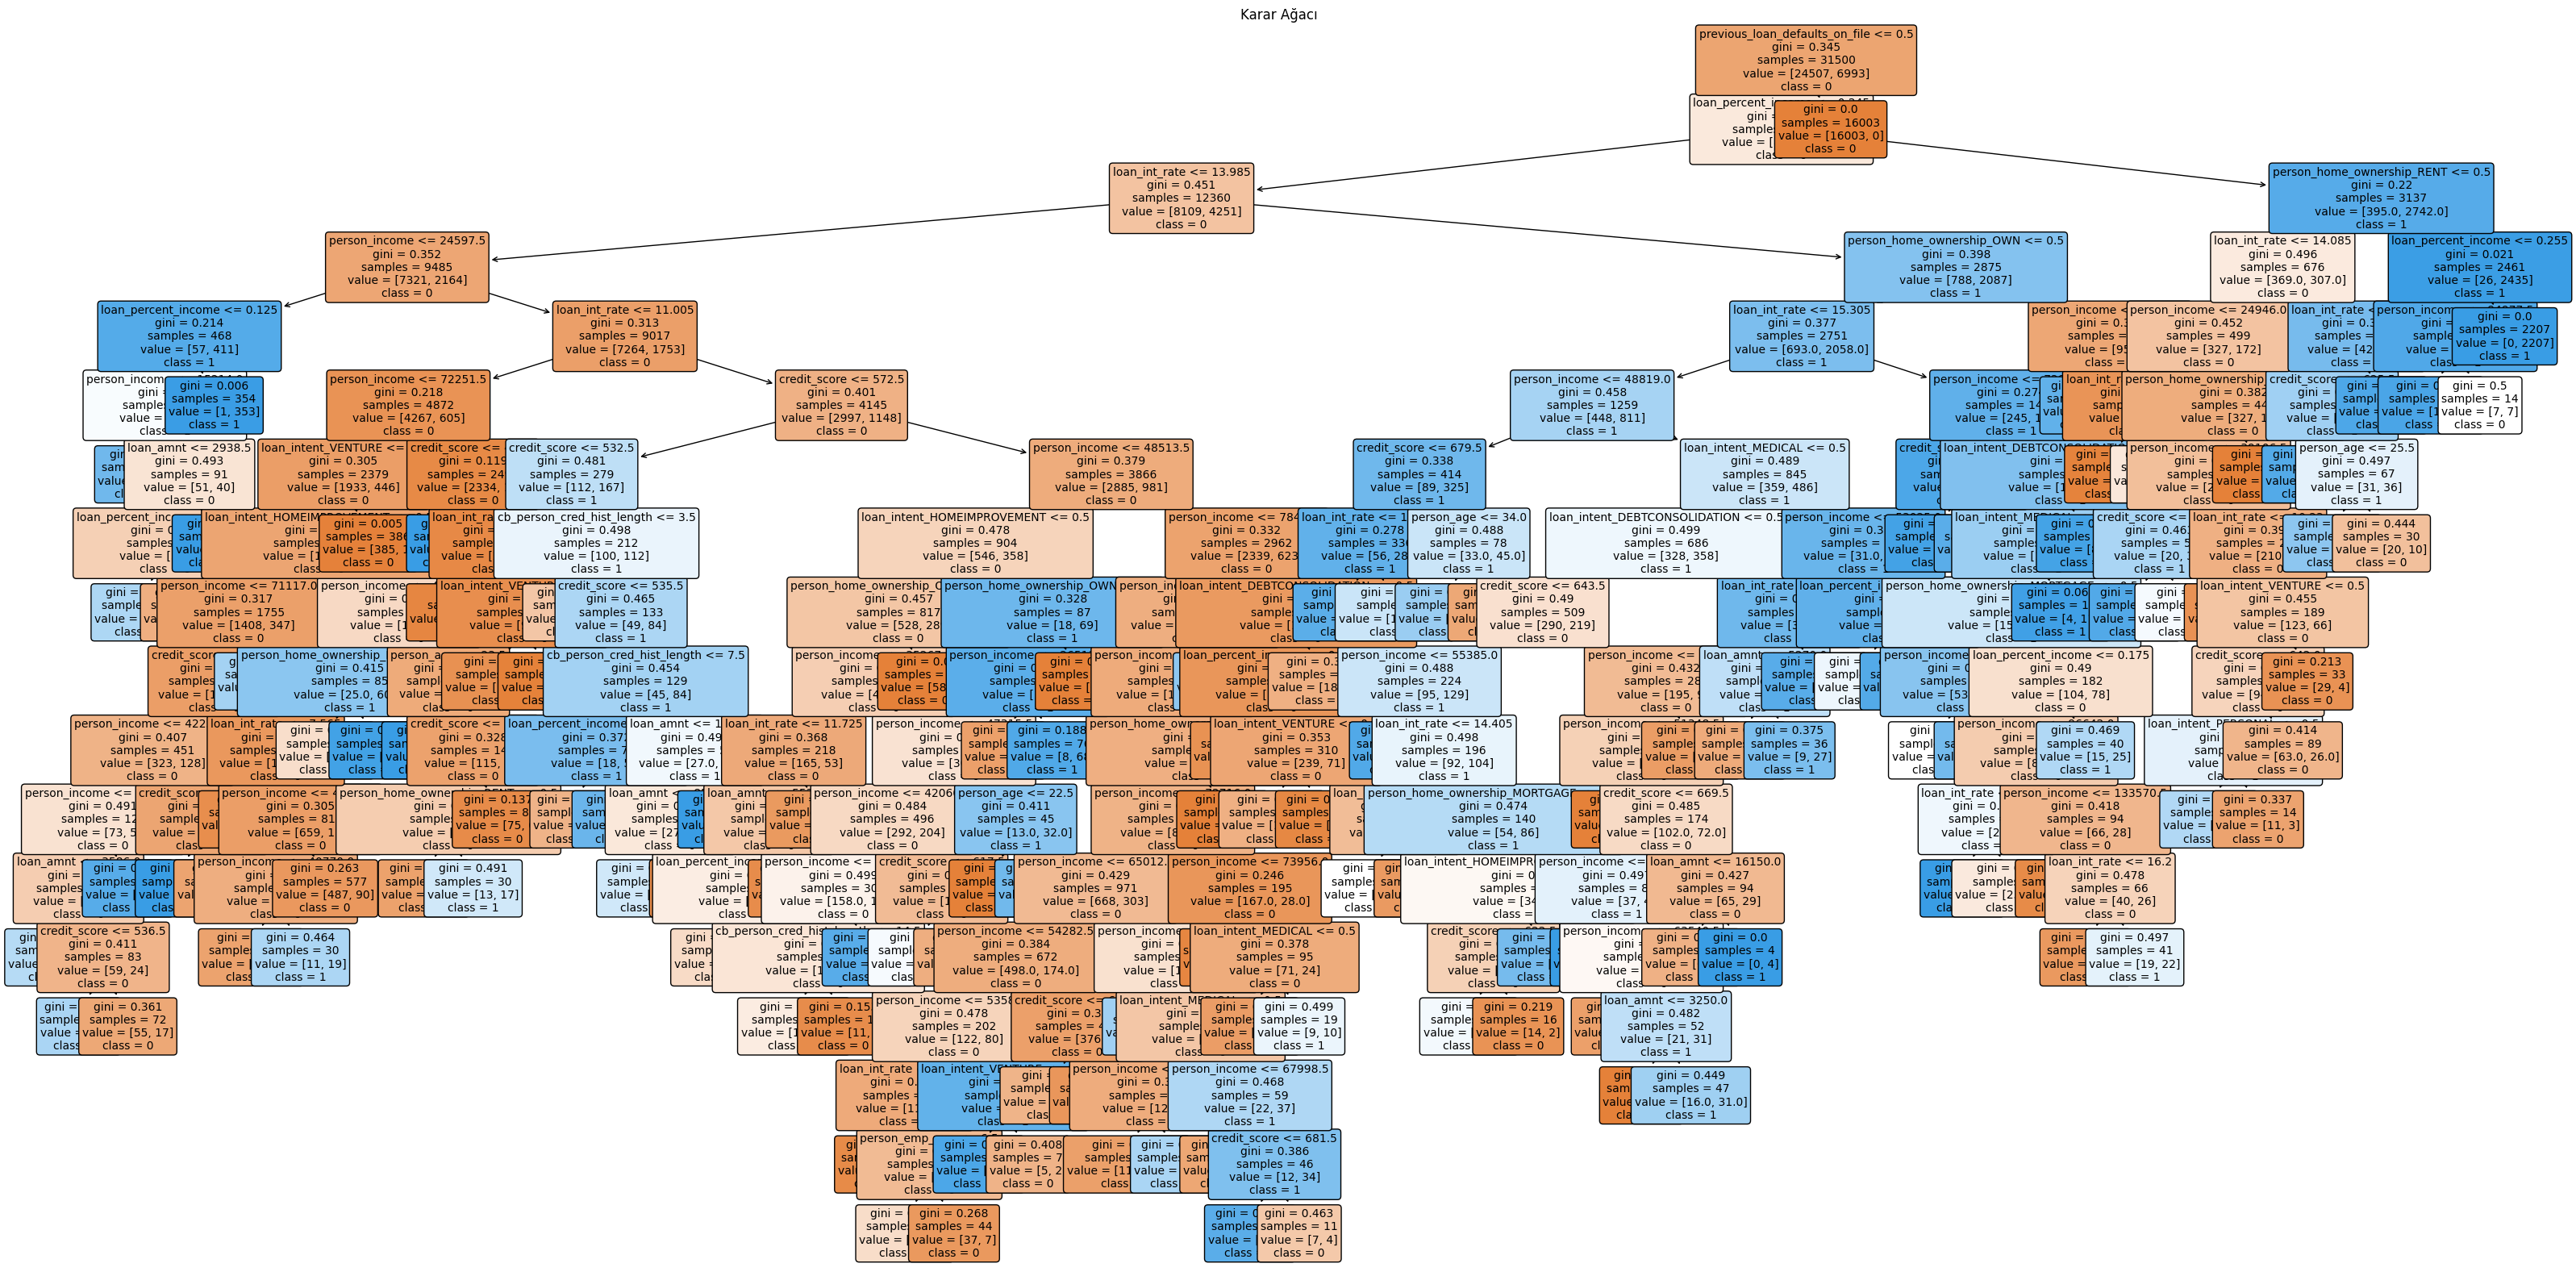

In [ ]:
plt.figure(figsize=(40, 20))
plot_tree(
    model,
    filled=True,
    feature_names=X_train.columns,
    class_names=['0', '1'],
    rounded=True,
    fontsize=10
)
plt.title("Karar Ağacı")
plt.show()

In [ ]:
n_nodes = model.tree_.node_count
n_leaves = model.tree_.n_leaves
max_depth = model.tree_.max_depth

print(f"Toplam Düğüm Sayısı: {n_nodes}")
print(f"Yaprak Düğüm Sayısı: {n_leaves}")
print(f"Maksimum Derinlik: {max_depth}")

Toplam Düğüm Sayısı: 259
Yaprak Düğüm Sayısı: 130
Maksimum Derinlik: 17


person_age: 0.0030
person_gender: 0.0000
person_education: 0.0000
person_income: 0.1161
person_emp_exp: 0.0005
loan_amnt: 0.0047
loan_int_rate: 0.1722
loan_percent_income: 0.1876
cb_person_cred_hist_length: 0.0018
credit_score: 0.0212
previous_loan_defaults_on_file: 0.4068
person_home_ownership_MORTGAGE: 0.0024
person_home_ownership_OTHER: 0.0000
person_home_ownership_OWN: 0.0144
person_home_ownership_RENT: 0.0406
loan_intent_DEBTCONSOLIDATION: 0.0074
loan_intent_EDUCATION: 0.0000
loan_intent_HOMEIMPROVEMENT: 0.0067
loan_intent_MEDICAL: 0.0081
loan_intent_PERSONAL: 0.0005
loan_intent_VENTURE: 0.0061


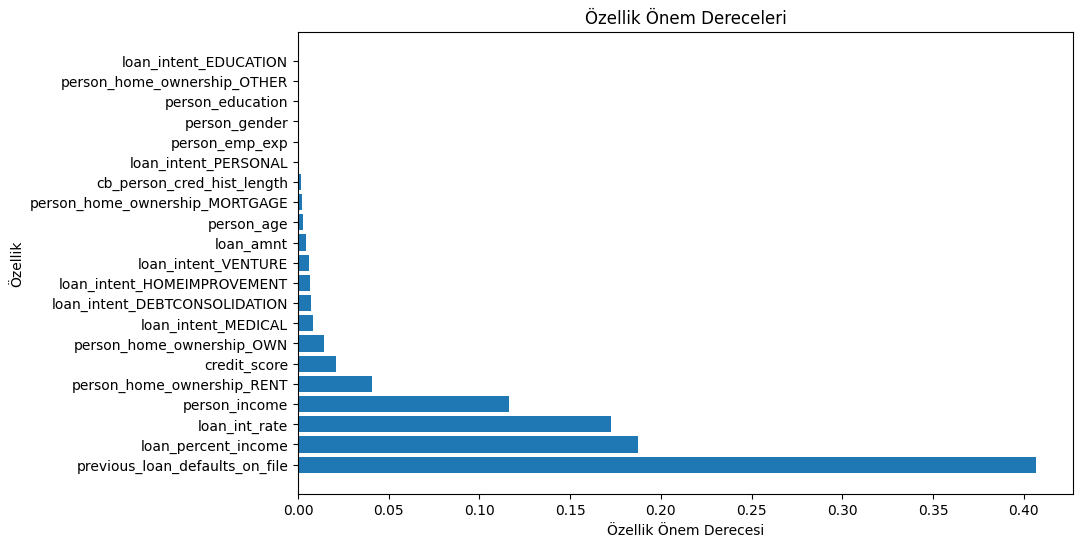

In [ ]:
importances = model.feature_importances_

for feature_name, importance in zip(X_train.columns, importances):
    print(f"{feature_name}: {importance:.4f}")

feature_importance_dict = dict(zip(X_train.columns, importances))

sorted_feature_importance = dict(sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True))

features = list(sorted_feature_importance.keys())
importances = list(sorted_feature_importance.values())

plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel('Özellik Önem Derecesi')
plt.ylabel('Özellik')
plt.title('Özellik Önem Dereceleri')
plt.show()

In [ ]:
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, x_pred)
print("Test Verisi Doğruluğu:", accuracy_test)
print("Train Verisi Doğruluğu:", accuracy_train)
f1_test = f1_score(y_test, y_pred, average='weighted')
f1_train = f1_score(y_train, x_pred, average='weighted')
print("Test İçin F1 Skoru:", f1_test)
print("Train İçin F1 Skoru:", f1_train)
precision_test = precision_score(y_test, y_pred, average='weighted')
precision_train = precision_score(y_train, x_pred, average='weighted')
print("Test İçin Precision:", precision_test)
print("Train İçin Precision :", precision_train)
recall_test = recall_score(y_test, y_pred, average='weighted')
recall_train = recall_score(y_train, x_pred, average='weighted')
print("Test İçin Recall:", recall_test)
print("Train İçin Recall :", recall_train)

Test Verisi Doğruluğu: 0.9226666666666666
Train Verisi Doğruluğu: 0.9366031746031745
Test İçin F1 Skoru: 0.9213402733586129
Train İçin F1 Skoru: 0.9353624472906709
Test İçin Precision: 0.9210596020980731
Train İçin Precision : 0.9355042001461289
Test İçin Recall: 0.9226666666666666
Train İçin Recall : 0.9366031746031745


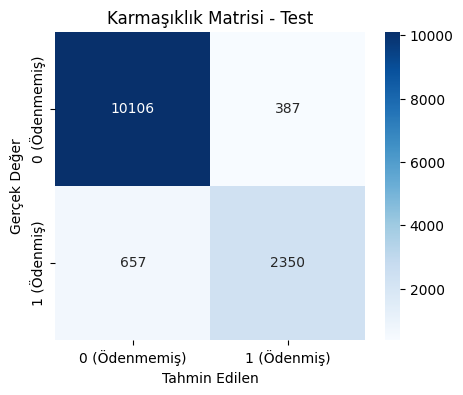

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0 (Ödenmemiş)", "1 (Ödenmiş)"],
            yticklabels=["0 (Ödenmemiş)", "1 (Ödenmiş)"])
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Değer")
plt.title("Karmaşıklık Matrisi - Test")
plt.show()

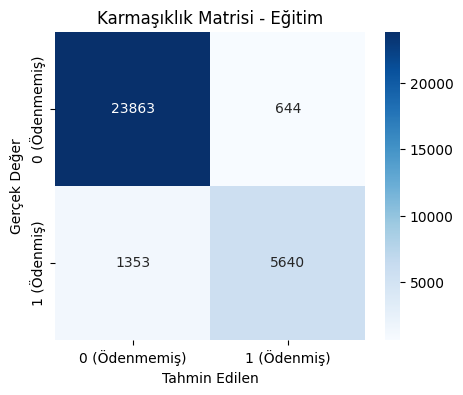

In [ ]:
cm = confusion_matrix(y_train, x_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0 (Ödenmemiş)", "1 (Ödenmiş)"],
            yticklabels=["0 (Ödenmemiş)", "1 (Ödenmiş)"])
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Değer")
plt.title("Karmaşıklık Matrisi - Eğitim")
plt.show()

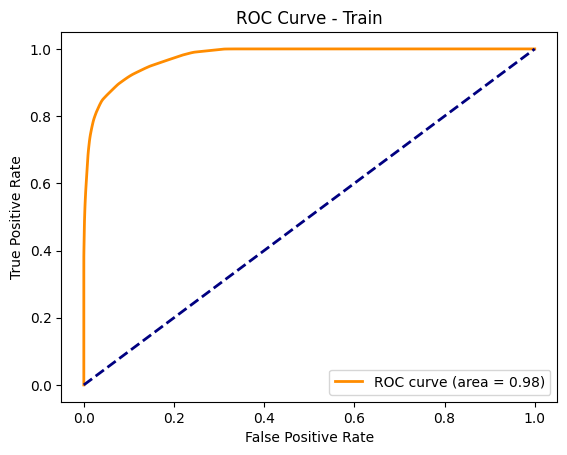

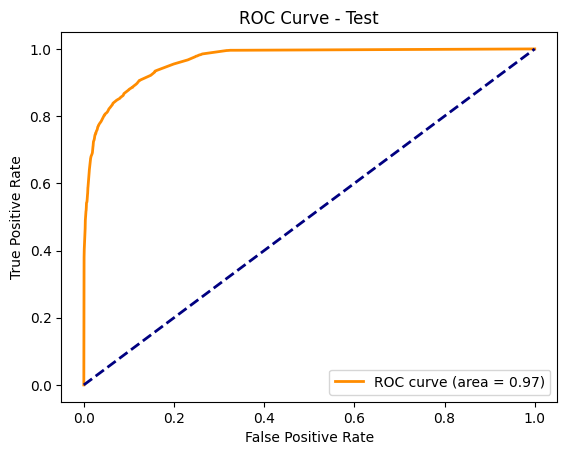

In [ ]:
y_pred_proba_test = model.predict_proba(X_test)
x_pred_proba_train = model.predict_proba(X_train)
y_pred_proba_test = y_pred_proba_test[:, 1]
x_pred_proba_train = x_pred_proba_train[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, x_pred_proba_train)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Train')
plt.legend(loc="lower right")
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_test)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score

# Modeli oluştur
model = DecisionTreeClassifier(
    random_state=42,
    max_depth=25,
    min_samples_split=42,
    min_weight_fraction_leaf=0,
    min_samples_leaf=3,
    max_leaf_nodes=130,
    max_features=None,
    ccp_alpha=0
)

# 3 katlı çapraz doğrulama ile skorları hesapla
cv_scores = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy')
print("Çapraz Doğrulama Skorları:", cv_scores)
print("Ortalama Doğruluk:", cv_scores.mean())

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

x_pred = model.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, x_pred)

print("Test Doğruluğu:", test_accuracy)
print("Eğitim Doğruluğu:", train_accuracy)

Çapraz Doğrulama Skorları: [0.91990476 0.91285714 0.91980952]
Ortalama Doğruluk: 0.9175238095238095
Test Doğruluğu: 0.9226666666666666
Eğitim Doğruluğu: 0.9366031746031745


**Örnek sığ ve az yapraklı karar ağacı** (Hesaplamaların gösterilebilmesi için)

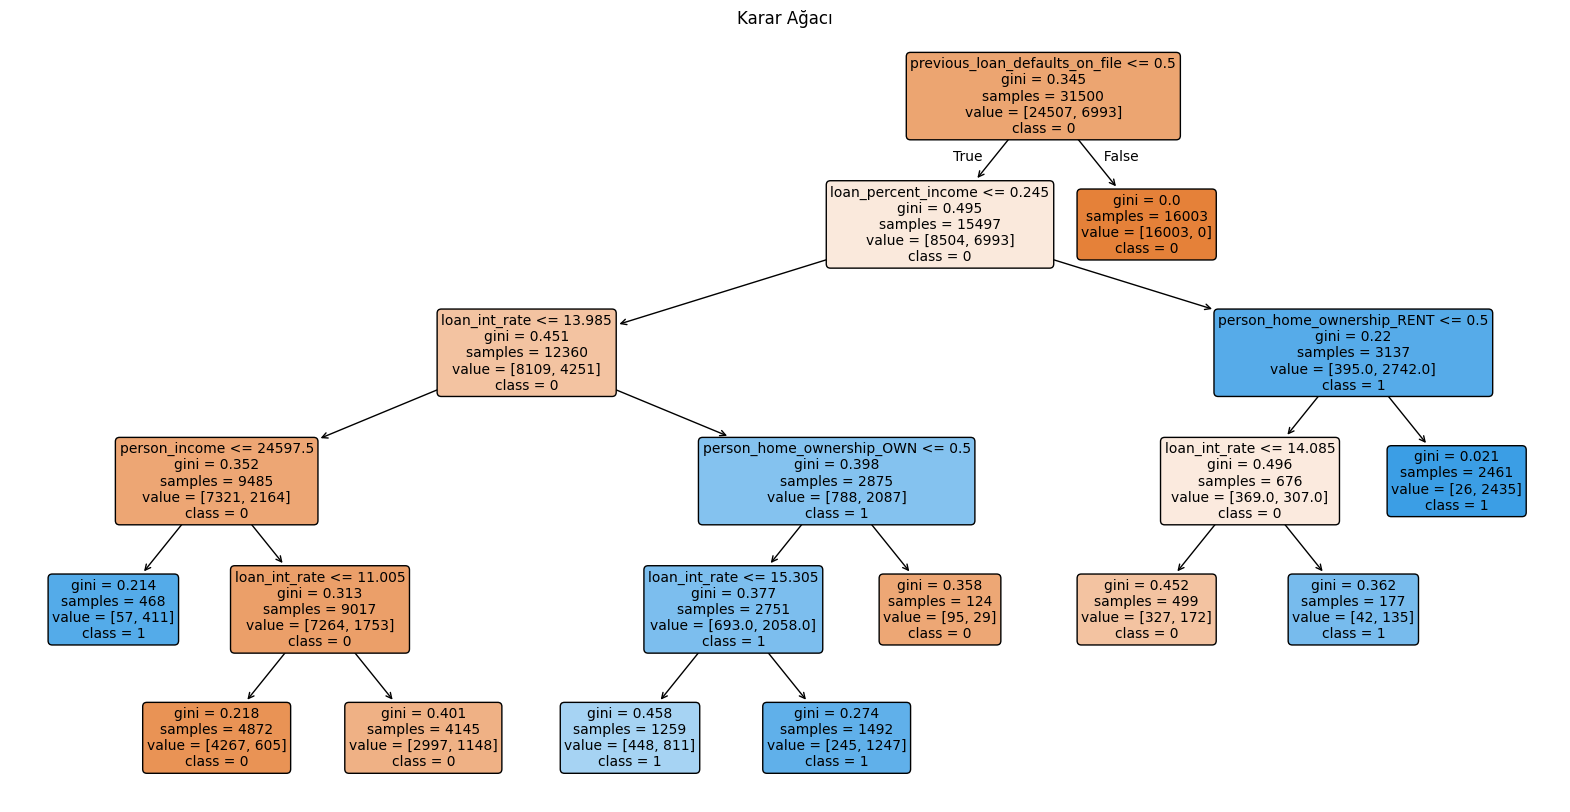

In [ ]:
model = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=42, min_weight_fraction_leaf=0,min_samples_leaf=3, max_leaf_nodes=10, max_features= None, ccp_alpha=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
x_pred = model.predict(X_train)
plt.figure(figsize=(20, 10))  # Görselin boyutunu ayarla
plot_tree(
    model,                     # Eğitilmiş model
    filled=True,               # Düğümleri renklendir
    feature_names=X_train.columns,  # Özellik isimleri (eğer X_train bir DataFrame ise)
    class_names=['0', '1'],   # Sınıf isimleri
    rounded=True,              # Düğümleri yuvarlak yap
    fontsize=10                # Yazı boyutu
)
plt.title("Karar Ağacı")
plt.show()

# Verilerin Eğitim - Test Olarak Ayrılması ve Regresyon Ağacı

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
y_reg = data_reg['loan_amnt']
X_reg = data_reg.drop(columns='loan_amnt', axis=1)

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

In [ ]:
X_train_reg.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length', 'credit_score',
       'previous_loan_defaults_on_file', 'loan_status',
       'person_home_ownership_MORTGAGE', 'person_home_ownership_OTHER',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE'],
      dtype='object')

In [ ]:
param_dist = {
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None],
    'ccp_alpha': uniform(0, 0.1)
}

reg_tree = DecisionTreeRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=reg_tree,
    param_distributions=param_dist,
    n_iter=50,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train_reg, y_train_reg)

print("En iyi hiperparametreler:", random_search.best_params_)
best_reg_tree = random_search.best_estimator_

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np

# Modeli eğit
reg_tree = DecisionTreeRegressor(
    random_state=42,
    ccp_alpha=0.03696544560614045,
    max_depth=19,
    max_features=None,
    min_samples_leaf=6,
    min_samples_split=6
)
reg_tree.fit(X_train_reg, y_train_reg)

# Test verisi üzerinde tahmin yap
y_reg_pred = reg_tree.predict(X_test_reg)

# Eğitim verisi üzerinde tahmin yap
x_reg_pred = reg_tree.predict(X_train_reg)

# Eğitim verisi üzerinde performans ölçütleri
mse_train = mean_squared_error(y_train_reg, x_reg_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train_reg, x_reg_pred)
r2_train = r2_score(y_train_reg, x_reg_pred)
explained_variance_train = explained_variance_score(y_train_reg, x_reg_pred)

# Test verisi üzerinde performans ölçütleri
mse_test = mean_squared_error(y_test_reg, y_reg_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test_reg, y_reg_pred)
r2_test = r2_score(y_test_reg, y_reg_pred)
explained_variance_test = explained_variance_score(y_test_reg, y_reg_pred)

print("Eğitim Verisi Performansı:")
print(f"  MSE: {mse_train}")
print(f"  RMSE: {rmse_train}")
print(f"  MAE: {mae_train}")
print(f"  R²: {r2_train}")
print(f"  Açıklanan Varyans: {explained_variance_train}")

print("\nTest Verisi Performansı:")
print(f"  MSE: {mse_test}")
print(f"  RMSE: {rmse_test}")
print(f"  MAE: {mae_test}")
print(f"  R²: {r2_test}")
print(f"  Açıklanan Varyans: {explained_variance_test}")

Eğitim Verisi Performansı:
  MSE: 78974.17092029096
  RMSE: 281.0234348240213
  MAE: 121.80276993208405
  R²: 0.9980086537218649
  Açıklanan Varyans: 0.9980086537218649

Test Verisi Performansı:
  MSE: 154138.6765619519
  RMSE: 392.6049879483855
  MAE: 187.46035761479402
  R²: 0.9961830590839347
  Açıklanan Varyans: 0.9961830590857343


Hesaplamaları göstermek için 3 derinliğinde örnek regresyon ağacı

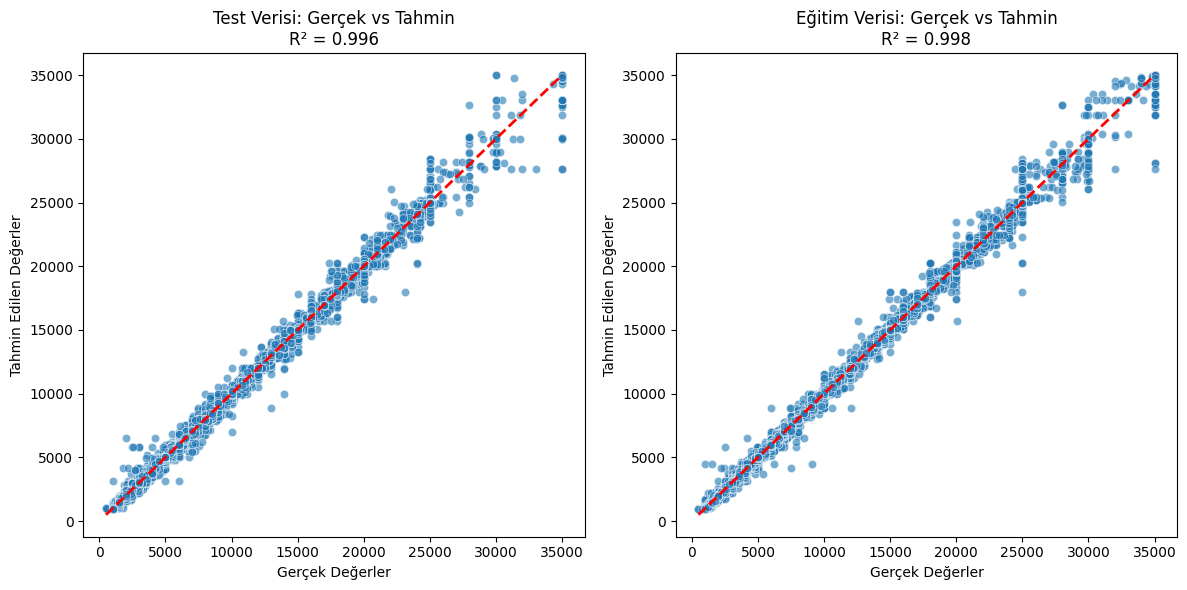

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test_reg, y=y_reg_pred, alpha=0.6)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Test Verisi: Gerçek vs Tahmin\nR² = {:.3f}'.format(r2_test))

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_train_reg, y=x_reg_pred, alpha=0.6)
plt.plot([y_train_reg.min(), y_train_reg.max()], [y_train_reg.min(), y_train_reg.max()], 'r--', lw=2)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Eğitim Verisi: Gerçek vs Tahmin\nR² = {:.3f}'.format(r2_train))

plt.tight_layout()
plt.show()

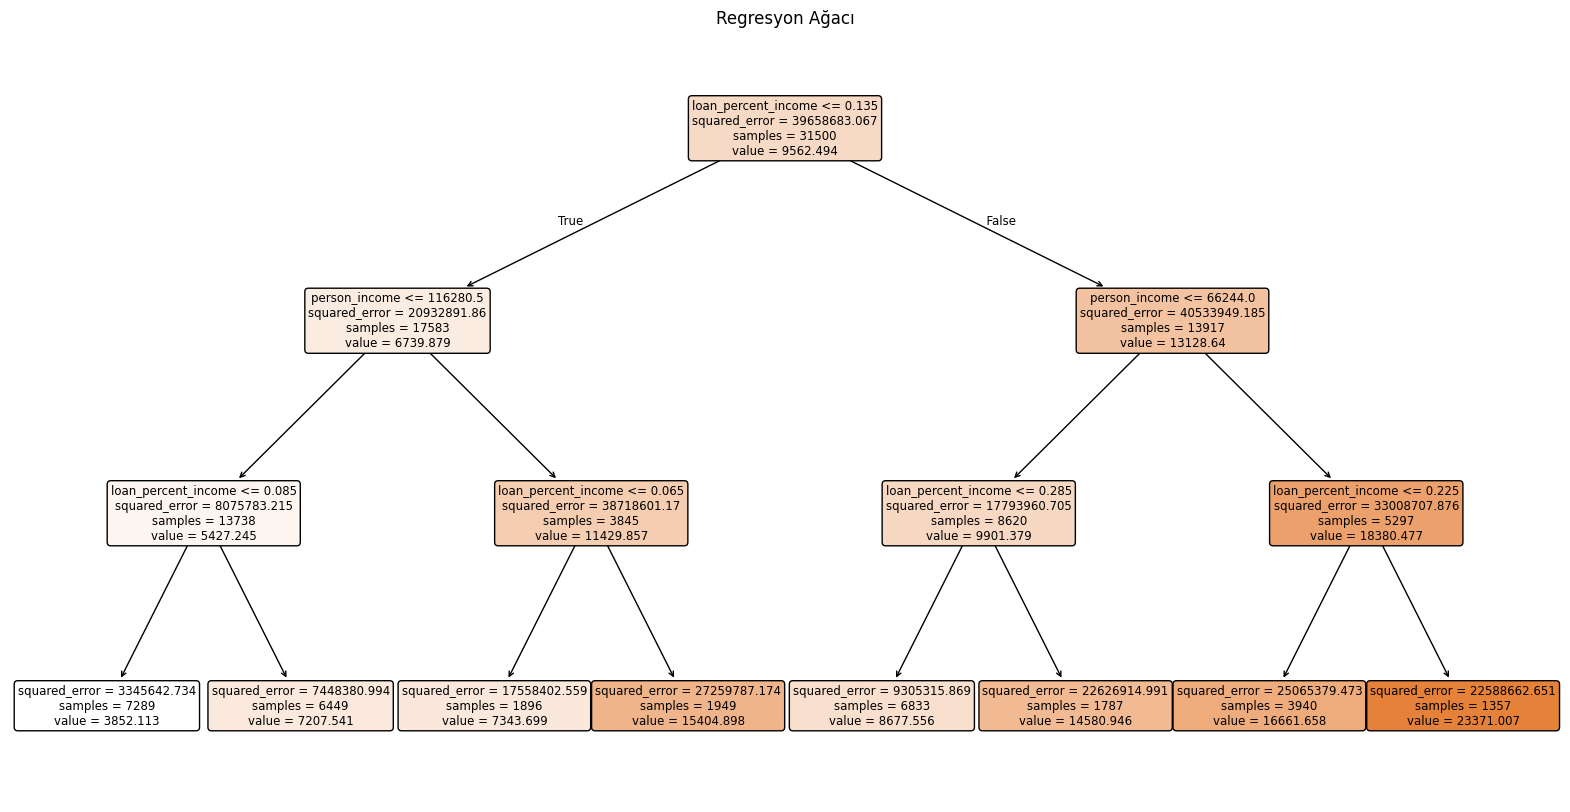

In [ ]:
rt = DecisionTreeRegressor(
    random_state=42,
    max_depth=3
)
rt.fit(X_train_reg, y_train_reg)
plt.figure(figsize=(20, 10))
plot_tree(rt, filled=True, feature_names=X_reg.columns, rounded=True)
plt.title("Regresyon Ağacı")
plt.show()